Please create a copy if you want to play with the data, just to make sure not to unwillingly make any changes to the original code ! Thanks ♥

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# **Loading and Organizing the Data**

We upload the UK Visa Dataset through GitHub
The dataset was manipulated to make it lighter, these variables where cancelled from the original dataset: "Quarter", "Nationality", "Visa type group", "Visa type subgroup"

In [ ]:
url = 'https://raw.githubusercontent.com/IAtechnerds/Dataset-2/main/Uk_visa_2.csv'
df_UK_Visa = pd.read_csv(url,";")

In [ ]:
df_UK_Visa.sample(5)

,Column1,Nationality,Region,Visa type,Applicant type,Case outcome,Decisions
48032,2007.0,Korea (South),Asia East,Dep. joining or accompanying,Dependant,Refused,17.0
267748,2019.0,Ukraine,Europe Other,Visitors,All,Refused,1113.0
116036,2011.0,British overseas citizens,Other,Other settlement visas,All,Withdrawn,1.0
132761,2012.0,Kyrgyzstan,Asia Central,Sponsored study,Main applicant,Refused,1.0
9609,2005.0,Ivory Coast,Africa Sub-Saharan,Family,All,Issued,10.0


In [ ]:
#We attribute the names we want to the columns
df_UK_Visa.columns = ['Year', 'Nationality', 'Region', 'Visa type', 'Applicant type', 'Case outcome', 'Decisions']
df_UK_Visa

,Year,Nationality,Region,Visa type,Applicant type,Case outcome,Decisions
0,2005.0,Afghanistan,Asia Central,Dep. joining or accompanying,Dependant,Issued,87.0
1,2005.0,Afghanistan,Asia Central,Dep. joining or accompanying,Dependant,Refused,17.0
2,2005.0,Afghanistan,Asia Central,Dep. joining or accompanying,Dependant,Withdrawn,1.0
3,2005.0,Afghanistan,Asia Central,Family,All,Issued,2.0
4,2005.0,Afghanistan,Asia Central,Family,All,Refused,4.0
...,...,...,...,...,...,...,...
295841,2021.0,Zimbabwe,Africa Sub-Saharan,Temporary worker,Main applicant,Issued,1.0
295842,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295844,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_UK_Visa = df_UK_Visa.rename(columns={"Column1":"Year"})
df_UK_Visa #we visualize the dataset with the renamed Column (other way of doing it)

,Year,Nationality,Region,Visa type,Applicant type,Case outcome,Decisions
0,2005.0,Afghanistan,Asia Central,Dep. joining or accompanying,Dependant,Issued,87.0
1,2005.0,Afghanistan,Asia Central,Dep. joining or accompanying,Dependant,Refused,17.0
2,2005.0,Afghanistan,Asia Central,Dep. joining or accompanying,Dependant,Withdrawn,1.0
3,2005.0,Afghanistan,Asia Central,Family,All,Issued,2.0
4,2005.0,Afghanistan,Asia Central,Family,All,Refused,4.0
...,...,...,...,...,...,...,...
295841,2021.0,Zimbabwe,Africa Sub-Saharan,Temporary worker,Main applicant,Issued,1.0
295842,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295844,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_UK_Visa.describe() #just some statistical information

,Year,Decisions
count,295842.000000,295842.000000
mean,2012.617231,146.666444
std,4.637996,2178.583970
min,2005.000000,1.000000
25%,2009.000000,1.000000
50%,2012.000000,3.000000
75%,2017.000000,15.000000
max,2021.000000,234827.000000


In [ ]:
df_UK_Visa["Case outcome"].unique() #We visualize the values under Case outcome

array(['Issued', 'Refused', 'Withdrawn', 'Lapsed', nan], dtype=object)

**Data manipulation decision**: Now we try to delete the values "Withdrawn", "Lapsed", nan -> We are interested only in the Issued and Refused cases

In [ ]:
df_UK_Visa[df_UK_Visa['Case outcome'].isin(['Issued', 'Refused'])]

,Year,Nationality,Region,Visa type,Applicant type,Case outcome,Decisions
0,2005.0,Afghanistan,Asia Central,Dep. joining or accompanying,Dependant,Issued,87.0
1,2005.0,Afghanistan,Asia Central,Dep. joining or accompanying,Dependant,Refused,17.0
3,2005.0,Afghanistan,Asia Central,Family,All,Issued,2.0
4,2005.0,Afghanistan,Asia Central,Family,All,Refused,4.0
5,2005.0,Afghanistan,Asia Central,Family,All,Issued,205.0
...,...,...,...,...,...,...,...
295837,2021.0,Zimbabwe,Africa Sub-Saharan,Skilled worker,Main applicant,Issued,1.0
295838,2021.0,Zimbabwe,Africa Sub-Saharan,Temporary worker,Main applicant,Issued,8.0
295839,2021.0,Zimbabwe,Africa Sub-Saharan,Temporary worker,Main applicant,Issued,1.0
295840,2021.0,Zimbabwe,Africa Sub-Saharan,Temporary worker,Main applicant,Issued,1.0


In [ ]:
UK_Visa_System = df_UK_Visa[df_UK_Visa.Year.notna()] #creating a new dataset "UK_Visa_System" that removes the NA value from the Year variable

In [ ]:
UK_Visa_System.shape

(295842, 7)

In [ ]:
df_UK_Visa.shape

(295846, 7)

In [ ]:
UK_Visa_System["Year"] = UK_Visa_System["Year"].astype(int) #transforming the data type of the variable "Year" into integers (before they were floats)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
UK_Visa_System["Decisions"] = UK_Visa_System["Decisions"].astype(int) #we do the same for the variable Decisions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
UK_Visa_System

,Year,Nationality,Region,Visa type,Applicant type,Case outcome,Decisions
0,2005,Afghanistan,Asia Central,Dep. joining or accompanying,Dependant,Issued,87
1,2005,Afghanistan,Asia Central,Dep. joining or accompanying,Dependant,Refused,17
2,2005,Afghanistan,Asia Central,Dep. joining or accompanying,Dependant,Withdrawn,1
3,2005,Afghanistan,Asia Central,Family,All,Issued,2
4,2005,Afghanistan,Asia Central,Family,All,Refused,4
...,...,...,...,...,...,...,...
295837,2021,Zimbabwe,Africa Sub-Saharan,Skilled worker,Main applicant,Issued,1
295838,2021,Zimbabwe,Africa Sub-Saharan,Temporary worker,Main applicant,Issued,8
295839,2021,Zimbabwe,Africa Sub-Saharan,Temporary worker,Main applicant,Issued,1
295840,2021,Zimbabwe,Africa Sub-Saharan,Temporary worker,Main applicant,Issued,1


In [ ]:
UK_Visa_System = UK_Visa_System[UK_Visa_System['Case outcome'].isin(['Issued', 'Refused'])]

In [ ]:
UK_Visa_System['Case outcome'].value_counts() #this doesn't regard the decisions though!! it's only the lines of code

Issued     166412
Refused     89533
Name: Case outcome, dtype: int64

In [ ]:
UK_Visa_System

,Year,Nationality,Region,Visa type,Applicant type,Case outcome,Decisions
0,2005,Afghanistan,Asia Central,Dep. joining or accompanying,Dependant,Issued,87
1,2005,Afghanistan,Asia Central,Dep. joining or accompanying,Dependant,Refused,17
3,2005,Afghanistan,Asia Central,Family,All,Issued,2
4,2005,Afghanistan,Asia Central,Family,All,Refused,4
5,2005,Afghanistan,Asia Central,Family,All,Issued,205
...,...,...,...,...,...,...,...
295837,2021,Zimbabwe,Africa Sub-Saharan,Skilled worker,Main applicant,Issued,1
295838,2021,Zimbabwe,Africa Sub-Saharan,Temporary worker,Main applicant,Issued,8
295839,2021,Zimbabwe,Africa Sub-Saharan,Temporary worker,Main applicant,Issued,1
295840,2021,Zimbabwe,Africa Sub-Saharan,Temporary worker,Main applicant,Issued,1


In [ ]:
UK_Visa_System.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255945 entries, 0 to 295841
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Year            255945 non-null  int64 
 1   Nationality     255945 non-null  object
 2   Region          255945 non-null  object
 3   Visa type       255945 non-null  object
 4   Applicant type  255945 non-null  object
 5   Case outcome    255945 non-null  object
 6   Decisions       255945 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 15.6+ MB


In [ ]:
#Sum of decisions by Region by discending order
#We need to sum the values because of the dataset we have: we have clustered a certain number of applications with the same features
#if we simply count the values, Python will count the lines of data, not the actual number of decisions

UK_Visa_System.groupby('Region')['Decisions'].sum().sort_values(ascending=False)

Region
Asia South                   11885308
Asia East                     6744588
Africa Sub-Saharan            6381270
Europe Other                  5867741
Middle East                   4344014
Asia South East               3046795
Africa North                  1645136
America Central and South     1137332
America North                  763723
Oceania                        524809
Asia Central                   434635
Other                          167801
EU 2                           143851
EU Other                        31899
EU 14                           11104
EU 8                             4552
Name: Decisions, dtype: int64

In [ ]:
#Sum of decisions by Year
UK_Visa_System.groupby('Year')['Decisions'].sum().sort_values()

Year
2021     475036
2020    1189977
2008    2383208
2009    2423627
2010    2524077
2005    2524473
2007    2532109
2012    2554421
2011    2596188
2006    2707043
2014    2757046
2013    2828237
2015    2840584
2016    2876540
2017    3041900
2018    3275589
2019    3604503
Name: Decisions, dtype: int64

In [ ]:
#Sum of decisions by Visa type
UK_Visa_System.groupby('Visa type')['Decisions'].sum().sort_values(ascending=False)

Visa type
Visitors                              31395625
Sponsored study                        3230869
Other study                            2456582
Other work visas and exemptions        1409204
Skilled worker                         1071307
Family                                 1007215
Other temporary visas                   696712
EEA family permit                       622235
Temporary worker                        519060
Dep. joining or accompanying            334252
High value                              204637
Other settlement visas                   95417
EU Settlement Scheme family permit       91443
Name: Decisions, dtype: int64

In [ ]:
#Sum of decisions by Applicant type
UK_Visa_System.groupby('Applicant type')['Decisions'].sum().sort_values(ascending=False)
#here we see that there were some mistakes with the data -> there are two values clustered as "Main applicant" and "Main Applicant" ...

Applicant type
All               33834463
Main applicant     7756678
Dependant          1535459
Main Applicant        7958
Name: Decisions, dtype: int64

In [ ]:
#so we will replace all the values "Main Applicant" in "Main applicant"
UK_Visa_System['Applicant type'] = UK_Visa_System['Applicant type'].replace(['Main Applicant'],'Main applicant')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Sum of decisions by Applicant type
UK_Visa_System.groupby('Applicant type')['Decisions'].sum().sort_values(ascending=False)

Applicant type
All               33834463
Main applicant     7764636
Dependant          1535459
Name: Decisions, dtype: int64

**IDEA** -> To make the analysis easier, we will add two new columns, one that assessed whether the number of decisions in that code line where issued, one whether it was refused. It will be composed of boolean values.

In [ ]:
#this np.where works like an if else statement 

UK_Visa_System['ISSUED'] = np.where(UK_Visa_System['Case outcome'] == 'Issued', 1, 0)
UK_Visa_System['REFUSED'] = np.where(UK_Visa_System['Case outcome'] == 'Refused', 1, 0)
UK_Visa_System

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Year,Nationality,Region,Visa type,Applicant type,Case outcome,Decisions,ISSUED,REFUSED
0,2005,Afghanistan,Asia Central,Dep. joining or accompanying,Dependant,Issued,87,1,0
1,2005,Afghanistan,Asia Central,Dep. joining or accompanying,Dependant,Refused,17,0,1
3,2005,Afghanistan,Asia Central,Family,All,Issued,2,1,0
4,2005,Afghanistan,Asia Central,Family,All,Refused,4,0,1
5,2005,Afghanistan,Asia Central,Family,All,Issued,205,1,0
...,...,...,...,...,...,...,...,...,...
295837,2021,Zimbabwe,Africa Sub-Saharan,Skilled worker,Main applicant,Issued,1,1,0
295838,2021,Zimbabwe,Africa Sub-Saharan,Temporary worker,Main applicant,Issued,8,1,0
295839,2021,Zimbabwe,Africa Sub-Saharan,Temporary worker,Main applicant,Issued,1,1,0
295840,2021,Zimbabwe,Africa Sub-Saharan,Temporary worker,Main applicant,Issued,1,1,0


In [ ]:
#creating two new dataframes to separate the data of the issued visas and the refused ones 
UK_Visa_System_Issued = UK_Visa_System[UK_Visa_System['ISSUED']==1]
UK_Visa_System_Issued

,Year,Nationality,Region,Visa type,Applicant type,Case outcome,Decisions,ISSUED,REFUSED
0,2005,Afghanistan,Asia Central,Dep. joining or accompanying,Dependant,Issued,87,1,0
3,2005,Afghanistan,Asia Central,Family,All,Issued,2,1,0
5,2005,Afghanistan,Asia Central,Family,All,Issued,205,1,0
8,2005,Afghanistan,Asia Central,Family,All,Issued,5,1,0
10,2005,Afghanistan,Asia Central,Family,All,Issued,103,1,0
...,...,...,...,...,...,...,...,...,...
295837,2021,Zimbabwe,Africa Sub-Saharan,Skilled worker,Main applicant,Issued,1,1,0
295838,2021,Zimbabwe,Africa Sub-Saharan,Temporary worker,Main applicant,Issued,8,1,0
295839,2021,Zimbabwe,Africa Sub-Saharan,Temporary worker,Main applicant,Issued,1,1,0
295840,2021,Zimbabwe,Africa Sub-Saharan,Temporary worker,Main applicant,Issued,1,1,0


In [ ]:
UK_Visa_System_Refused = UK_Visa_System[UK_Visa_System['REFUSED']==1]
UK_Visa_System_Refused

,Year,Nationality,Region,Visa type,Applicant type,Case outcome,Decisions,ISSUED,REFUSED
1,2005,Afghanistan,Asia Central,Dep. joining or accompanying,Dependant,Refused,17,0,1
4,2005,Afghanistan,Asia Central,Family,All,Refused,4,0,1
7,2005,Afghanistan,Asia Central,Family,All,Refused,33,0,1
9,2005,Afghanistan,Asia Central,Family,All,Refused,23,0,1
11,2005,Afghanistan,Asia Central,Family,All,Refused,21,0,1
...,...,...,...,...,...,...,...,...,...
295819,2021,Zimbabwe,Africa Sub-Saharan,Sponsored study,Dependant,Refused,3,0,1
295821,2021,Zimbabwe,Africa Sub-Saharan,Sponsored study,Main applicant,Refused,2,0,1
295831,2021,Zimbabwe,Africa Sub-Saharan,Skilled worker,Main applicant,Refused,1,0,1
295833,2021,Zimbabwe,Africa Sub-Saharan,Skilled worker,Dependant,Refused,5,0,1


## **ANALYSIS ON THE ORIGIN OF APPLICANTS (REGION AND NATIONALITY)**

In [ ]:
#TOTAL OF DECISION, BOTH ISSUED VISA BOTH REFUSED
UK_Visa_System.groupby('Region')['Decisions'].sum().sort_values(ascending=False)

Region
Asia South                   11885308
Asia East                     6744588
Africa Sub-Saharan            6381270
Europe Other                  5867741
Middle East                   4344014
Asia South East               3046795
Africa North                  1645136
America Central and South     1137332
America North                  763723
Oceania                        524809
Asia Central                   434635
Other                          167801
EU 2                           143851
EU Other                        31899
EU 14                           11104
EU 8                             4552
Name: Decisions, dtype: int64

In [ ]:
#ONLY ISSUED VISA
UK_Visa_System_Issued.groupby('Region')['Decisions'].sum().sort_values(ascending=False)

Region
Asia South                   9600253
Asia East                    6446850
Europe Other                 5385094
Africa Sub-Saharan           4580902
Middle East                  3986750
Asia South East              2786905
Africa North                 1302037
America Central and South     987014
America North                 734932
Oceania                       505236
Asia Central                  358774
EU 2                          128937
Other                         124971
EU Other                       29951
EU 14                          10409
EU 8                            3764
Name: Decisions, dtype: int64

In [ ]:
Region_Nationality_Data= [['Asia South', 11885308, 9600253], ['Asia East', 6744588, 6446850], ['Africa Sub-Saharan', 6381270, 4580902], ['Europe Other', 5867741, 5385094], ['Middle East', 4344014, 3986750], ['Asia South East', 3046795, 2786905], ['Africa North', 1645136, 1302037], ["America Central and South", 1137332, 987014], ["America North", 763723, 734932], ["Oceania", 524809 , 505236], ["Asia Central", 434635, 358774], ["Other", 167801, 124971], ["EU 2", 143851, 128937], ["EU Other", 31899, 29951], ["EU 14", 11104, 10409], ["EU 8", 4552, 3764]]

In [ ]:
#Create a new dataframe that puts together Region of Nationality, The total of decision, and the Number of Issued Visa
Region_Nationality_Issued_df = pd.DataFrame(Region_Nationality_Data, columns = ["Region", "Total Decision", "Issued Visa"])
Region_Nationality_Issued_df

,Region,Total Decision,Issued Visa
0,Asia South,11885308,9600253
1,Asia East,6744588,6446850
2,Africa Sub-Saharan,6381270,4580902
3,Europe Other,5867741,5385094
4,Middle East,4344014,3986750
5,Asia South East,3046795,2786905
6,Africa North,1645136,1302037
7,America Central and South,1137332,987014
8,America North,763723,734932
9,Oceania,524809,505236


In [ ]:
#Now we calculate the Issued Visa percentage 
Region_Nationality_Issued_df['Visa Issue Percentage'] = Region_Nationality_Issued_df['Issued Visa']  / Region_Nationality_Issued_df['Total Decision'] * 100 
Region_Nationality_Issued_df.sort_values("Visa Issue Percentage", ascending=False)

,Region,Total Decision,Issued Visa,Visa Issue Percentage
9,Oceania,524809,505236,96.270453
8,America North,763723,734932,96.230178
1,Asia East,6744588,6446850,95.585527
13,EU Other,31899,29951,93.893225
14,EU 14,11104,10409,93.740994
4,Middle East,4344014,3986750,91.775717
3,Europe Other,5867741,5385094,91.774569
5,Asia South East,3046795,2786905,91.470053
12,EU 2,143851,128937,89.632328
7,America Central and South,1137332,987014,86.783279


In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None) #to see the complete list of elements of a data frame

In [ ]:
#ANALYSIS PER COUNTRY (Pray for me)

#Sum of decisions by NATIONALITY by discending order

UK_Visa_System.groupby('Nationality')['Decisions'].sum().sort_values(ascending=False)

Nationality
India                         8057010
China                         6011105
Nigeria                       2786769
Russia                        2504284
Pakistan                      2418023
                               ...   
Niue                                5
Liechtenstein                       4
Pitcairn Islands (British)          3
Virgin Islands (British)            3
Gibraltar (British)                 2
Name: Decisions, Length: 213, dtype: int64

In [ ]:
#Sum of Issued Visa per Nationality 
UK_Visa_System_Issued.groupby('Nationality')['Decisions'].sum().sort_values(ascending=False)

Nationality
India                                 7042619
China                                 5743611
Russia                                2408508
Nigeria                               1779763
Pakistan                              1539585
Saudi Arabia                          1460594
Turkey                                1451633
South Africa                          1236296
Thailand                               935530
Philippines                            847859
Kuwait                                 714162
Ukraine                                604886
United States                          561380
Indonesia                              542522
Egypt                                  531837
Bangladesh                             414855
Sri Lanka                              408643
Australia                              365027
Colombia                               351106
Ghana                                  348169
Iran                                   319603
United Arab Emirates  

In [ ]:
#as we did before, we will compute the data to create a new dataframe that for each Nationality provides the data regarding the Total Number of Decision and the number of the Decisions where the Visa was issued
Nationality_Data= [["India", 8057010, 7042619], ["China", 6011105, 5743611], ["Nigeria", 2786769, 1779763], ["Russia", 2504284, 2408508], ["Pakistan", 2418023, 1539585], ["Turkey", 1622760, 1451633], ["Saudi Arabia", 1479615, 1460594], ["South Africa", 1282648, 1236296], ["Thailand", 999281, 935530], ["Philippines", 964715, 847859], ["Kuwait", 720814, 714162], ["Ukraine", 678152, 604886], ["Egypt", 628212, 531837], ["Bangladesh", 623779, 414855], ["United States", 583366, 561380], ["Ghana", 603701, 348169], ["Indonesia", 570208, 542522], ["Sri Lanka", 529368, 408643], ["Iran", 442650, 319603], ["Colombia", 379867, 351106], ["Australia", 377495, 365027], ["Algeria", 305572, 202731], ["Kenya", 281102, 231781], ["United Arab Emirates", 274654, 273469], ["Morocco", 268803, 227016], ["Lebanon", 255461, 223944], ["Nepal", 251853, 189963], ["Kazakhstan", 235223, 220178], ["Jordan", 233627, 207436], ["Zimbabwe", 221755, 148789], ["Vietnam", 215740,189051], ["Taiwan", 207327, 205805], ["Libya", 194073, 152871], ["Qatar", 193952, 193084], ["Iraq", 190746, 127799], ["Jamaica", 182370, 127423], ["Canada", 180357, 173552], ["Albania", 175543, 120407], ["Belarus", 175016, 164992], ["Japan", 170144, 166905], ["Hong Kong", 165106, 160213], ["Bahrain", 162209, 159993], ["Malaysia", 161730, 151380], ["Serbia", 160249, 151736], ["Korea (South)", 148788, 138730], ["Sudan", 148248, 104012], ["Syria", 139442, 98120], ["Uganda", 136435, 89283], ["New Zealand", 125289, 121163], ["Peru", 110083, 103408], ["Azerbaijan", 109769, 95824], ["Oman", 108354, 106786], ["Brazil", 106769, 90380], ["Tanzania", 102905, 82616], ["Cameroon", 96354, 65333], ["Tunisia", 95739, 79858], ["Afghanistan", 95463, 60815], ["Georgia", 84597, 70342], ["Romania", 83464, 74617], ["Gambia", 83019, 43097], ["Refugee", 79813, 57553], ["Ethiopia", 75209, 52099], ["Zambia", 73917, 62718], ["Sierra Leone", 73275, 48217], ["Other and unknown", 71242, 55655], ["Venezuela", 69725, 59787], ["Congo (Democratic Republic)", 68645, 42261], ["Ecuador", 67858, 60580], ["Somalia", 63351, 35331], ["Angola", 62726, 49535], ["Yemen", 60725, 38282], ["Bulgaria", 60387, 54320], ["Macedonia", 59267, 53982], ["Occupied Palestinian Territories", 59238, 43108], ["Uzbekistan", 58841, 41336], ["Bosnia and Herzegovina", 53243, 49889], ["Kosovo", 53176, 39900], ["Singapore", 49824, 47883], ["Burma", 47157, 38029], ["Former Yugoslavia", 43799, 42022], ["Moldova", 43780, 35310], ["Serbia and Montenegro", 43319, 39927], ["Ivory Coast", 42161, 29319], ["Malawi", 41257, 31190], ["Armenia", 39698, 36146], ["Mexico", 38722, 35251], ["Mongolia", 38105, 27784], ["Senegal", 38060, 25357], ["Eritrea", 35115, 23875], ["Dominican Republic", 31171, 26300], ["Cuba", 31114, 27054], ["Mauritius", 29446, 23594], ["Guyana", 24677, 20895], ["Croatia", 23255, 22602], ["Israel", 22527, 20370], ["Fiji", 20603, 17830], ["Guinea", 20198, 11413], ["Turkmenistan", 19802, 15850], ["Montenegro", 18691, 17621], ["Kyrgyzstan", 18274, 14678], ["Congo", 17001, 11001], ["Rwanda", 16823, 13028], ["Cambodia", 16687, 14351], ["Bolivia", 16654, 14239], ["Mozambique", 15866, 13541], ["Argentina", 15720, 14880], ["Chile", 15634, 14814], ["Stateless", 15446, 10716], ["Brunei", 14590, 14422], ["Trinidad and Tobago", 14019, 12778], ["Benin", 10708, 6409], ["Mali", 9609, 6988], ["Cyprus", 8471, 7186], ["Togo", 8405, 5776], ["Botswana", 8303, 6782], ["Liberia", 8004, 5674], ["Madagascar", 7599, 6820], ["Tajikistan", 7032, 5917], ["Gabon", 6768, 5568], ["Laos", 6592, 5684], ["Burkina", 5858, 4391], ["Swaziland", 5650, 4598], ["Burundi", 4873, 3298], ["Guinea-Bissau", 4585, 2291], ["Haiti", 4541, 3825], ["Mauritania", 4489, 3712], ["Barbados", 4204, 3704], ["Namibia", 3743, 2541], ["Lesotho", 3728, 3271], ["Macau", 3577, 3415], ["Niger", 3521, 2632], ["Djibouti", 3389, 2215], ["St. Lucia", 3146, 2401], ["Cape Verde", 3037, 2215], ["Bhutan", 2903, 2637], ["Equatorial Guinea", 2895, 2276], ["Comoros", 2768, 2103], ["Surinam", 2458, 2091], ["Sudan South", 2415, 1731], ["Chad", 2385, 1645], ["Maldives", 2372, 1951], ["Seychelles", 2364, 2090], ["Poland", 2055, 1683], ["France", 2023, 1961], ["Germany", 1998, 1918], ["Dominica", 1831, 1443], ["St. Vincent and the Grenadines", 1826, 1540], ["Grenada", 1777, 1490], ["Costa Rica", 1752, 1611], ["Italy", 1715, 1611], ["Sao Tome and Principe", 1700, 1106], ["Bahamas", 1678, 1452], ["Spain", 1455, 1362], ["St. Kitts and Nevis", 1422, 1173], ["Uruguay", 1358, 1277], ["British overseas citizens", 1257, 1014], ["Panama", 1250, 1076], ["Central African Republic", 1225, 876], ["Cyprus (Northern part of)", 1149, 890], ["Netherlands", 1113, 1022], ["Paraguay", 1031, 952], ["Guatemala", 1015, 915], ["Honduras", 966, 834], ["Latvia", 834, 695], ["El Salvador", 795, 699], ["Belize", 749, 675], ["Antigua and Barbuda", 656, 547], ["Portugal", 606, 558], ["Papua New Guinea", 508, 445], ["Nicaragua", 494, 414], ["Sweden", 471, 423], ["Denmark", 437, 390], ["Korea (North)", 436, 387], ["Greece", 428, 382], ["Norway", 411, 358], ["Belgium", 404, 376], ["Tonga", 389, 332], ["Lithuania", 385, 297], ["Hungary", 350, 324], ["Switzerland", 350, 323], ["Czech Republic", 300, 213], ["East Timor", 271, 194], ["Samoa", 255, 212], ["Estonia", 248, 224], ["Slovakia", 244, 207], ["Austria", 205, 189], ["Malta", 173, 163], ["Monaco", 168, 141], ["Finland", 154, 147], ["Slovenia", 136, 121], ["Andorra", 123, 96], ["Solomon Islands", 113, 100], ["Vanuatu", 80, 67], ["Iceland", 80, 51], ["Vatican City", 78, 78], ["Ireland", 75, 50], ["San Marino", 35, 30], ["Kiribati", 25, 21], ["Luxembourg", 20, 20], ["Tuvalu", 17, 14], ["Marshall Island", 11, 8], ["Bermuda (British)", 11, 8], ["Micronesia", 10, 9 ], ["Cayman Islands (British)", 9, 7], ["Nauru", 9, 5], ["Montserrat (British)", 5, 3], ["Turks and Caicos Islands (British)", 5, 5], ["Anguilla (British)", 5, 3], ["Niue", 5, 3], ["Liechtenstein", 4, 2], ["Pitcairn Islands (British)", 3, 3], ["Virgin Islands (British)", 3, 3], ["Gibraltar (British)", 2, 1]]

In [ ]:
#Create a new dataframe that puts together Nationality, The total of decision, and the Number of Issued Visa
Nationality_Issued_df = pd.DataFrame(Nationality_Data, columns = ["Nationality", "Total Decision", "Issued Visa"])
Nationality_Issued_df

,Nationality,Total Decision,Issued Visa
0,India,8057010,7042619
1,China,6011105,5743611
2,Nigeria,2786769,1779763
3,Russia,2504284,2408508
4,Pakistan,2418023,1539585
5,Turkey,1622760,1451633
6,Saudi Arabia,1479615,1460594
7,South Africa,1282648,1236296
8,Thailand,999281,935530
9,Philippines,964715,847859


In [ ]:
#Now we calculate the Issued Visa Rate 
Nationality_Issued_df['Visa Issue Rate'] = Nationality_Issued_df['Issued Visa']  / Nationality_Issued_df['Total Decision'] * 100 
Nationality_Issued_df.sort_values("Visa Issue Rate", ascending=False)

,Nationality,Total Decision,Issued Visa,Visa Issue Rate
198,Luxembourg,20,20,100.000000
206,Turks and Caicos Islands (British),5,5,100.000000
211,Virgin Islands (British),3,3,100.000000
210,Pitcairn Islands (British),3,3,100.000000
194,Vatican City,78,78,100.000000
...,...,...,...,...
204,Nauru,9,5,55.555556
59,Gambia,83019,43097,51.912213
209,Liechtenstein,4,2,50.000000
212,Gibraltar (British),2,1,50.000000


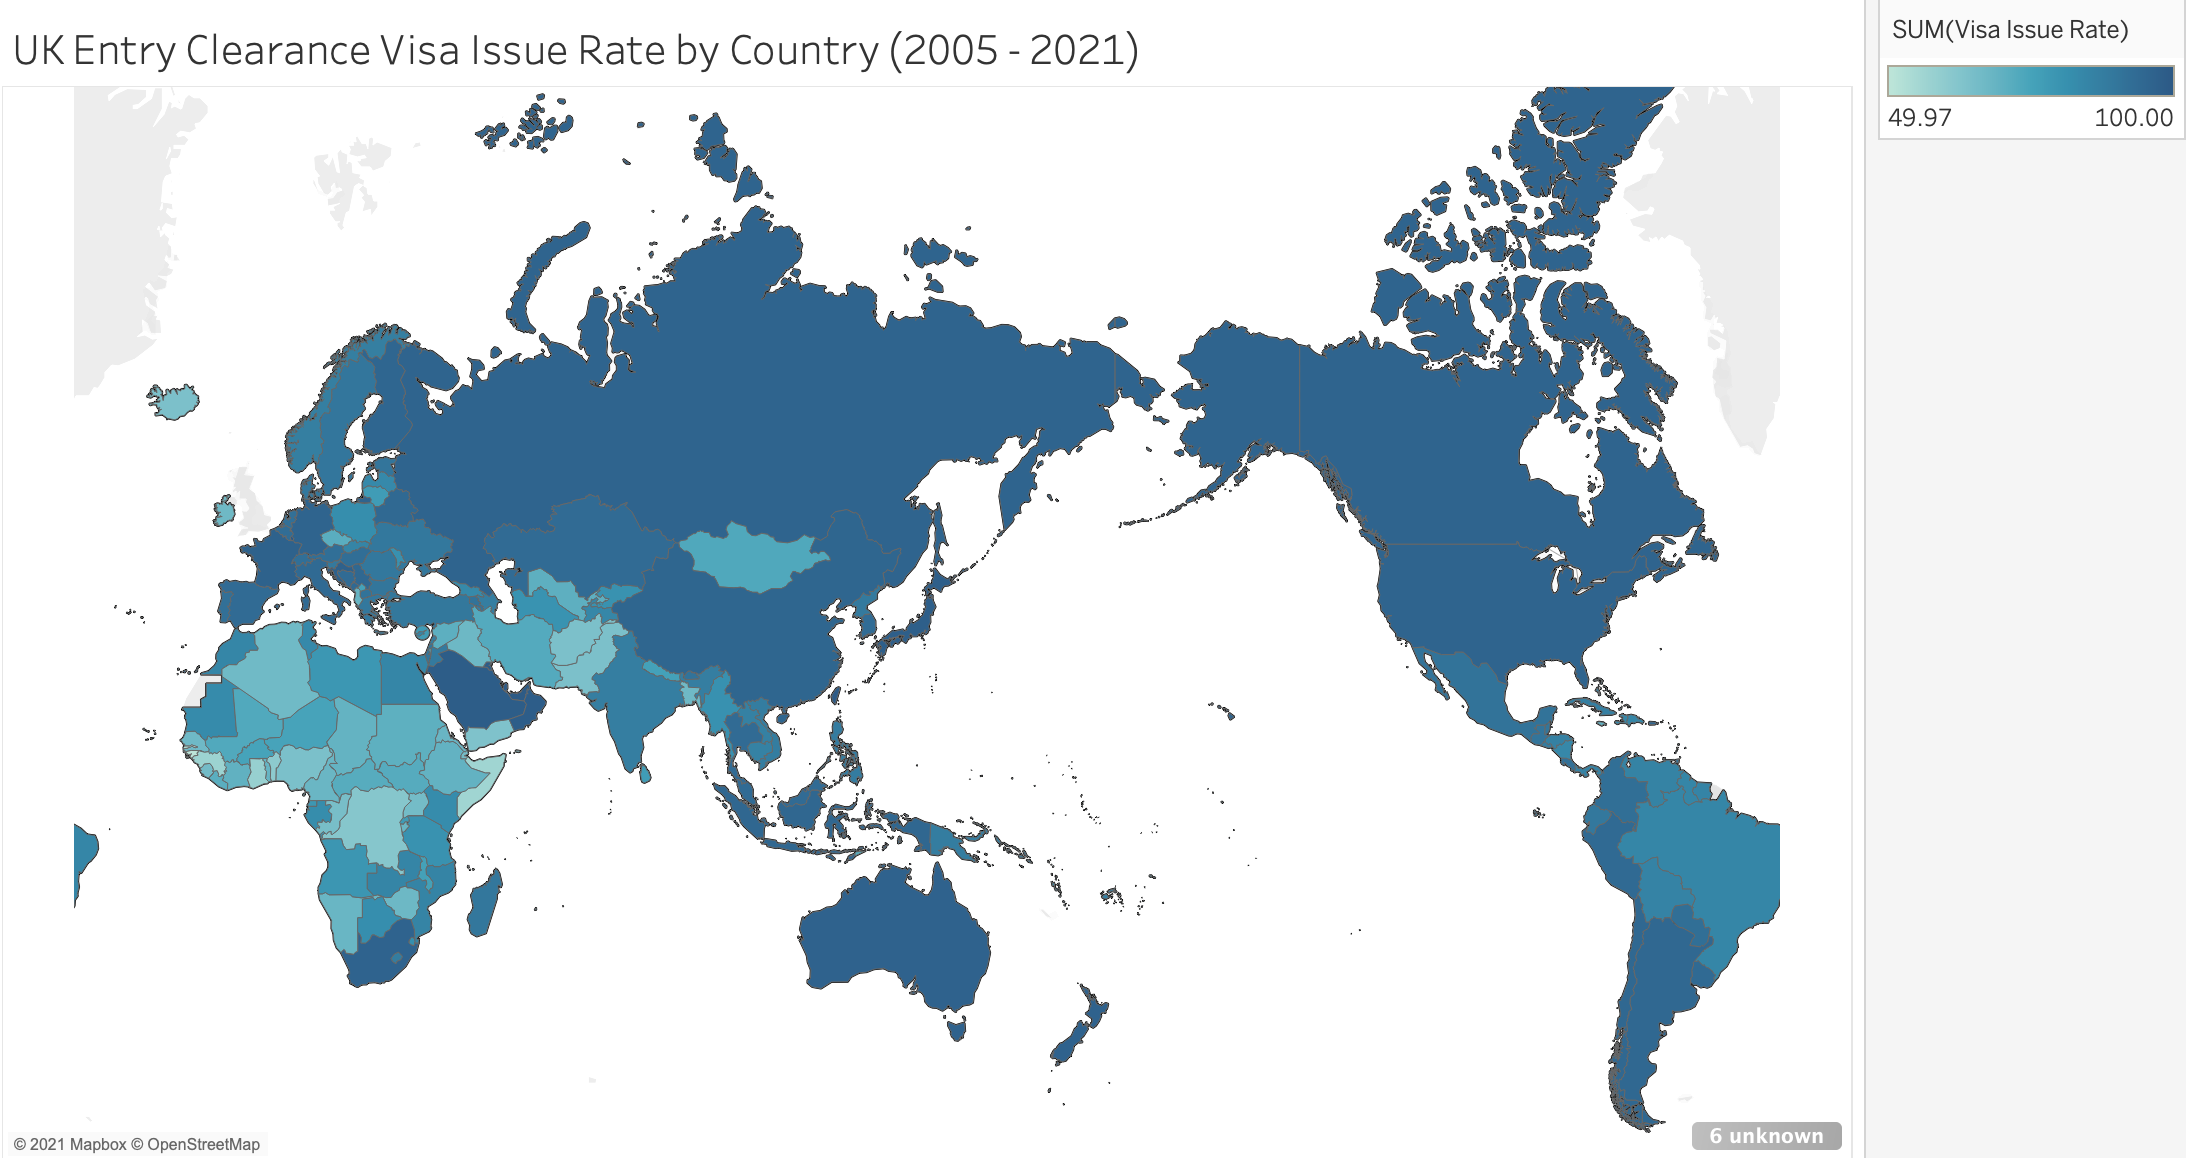

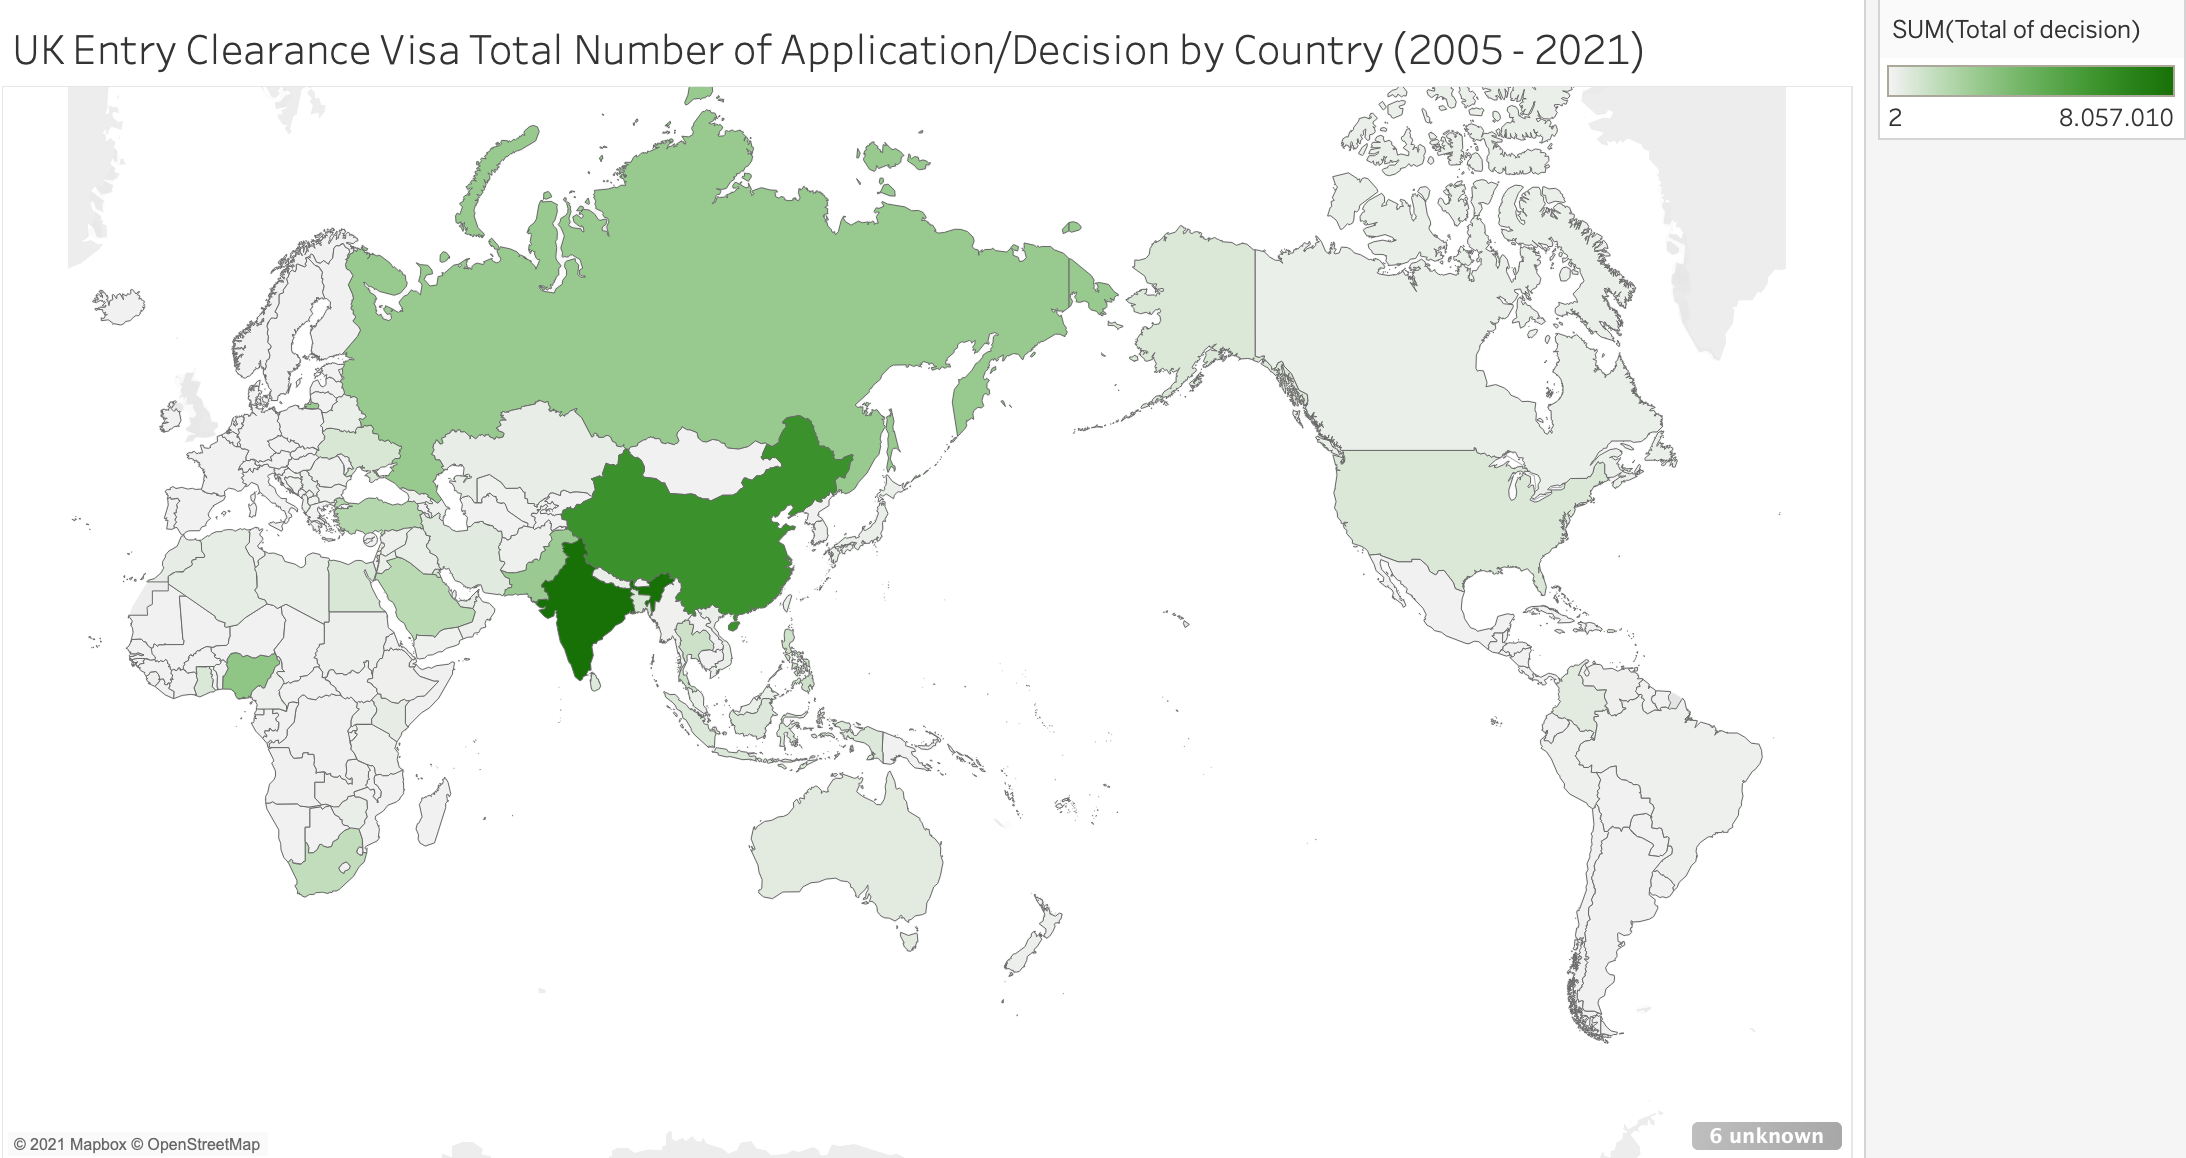

In [ ]:
Nationality_Issued_df.to_excel('\Data_For_Tableau.xlsx', index=False) #Saving this file as excel to use it in Tableau

Now trying to conduct the same type of analysis but clustering the dataset in two: all the data coming before and after 2015 (up until 2020), which is the year when the UK Algorithm (later recognized as biased) started to be used

In [ ]:
UK_Visa_System

,Year,Nationality,Region,Visa type,Applicant type,Case outcome,Decisions,ISSUED,REFUSED
0,2005,Afghanistan,Asia Central,Dep. joining or accompanying,Dependant,Issued,87,1,0
1,2005,Afghanistan,Asia Central,Dep. joining or accompanying,Dependant,Refused,17,0,1
3,2005,Afghanistan,Asia Central,Family,All,Issued,2,1,0
4,2005,Afghanistan,Asia Central,Family,All,Refused,4,0,1
5,2005,Afghanistan,Asia Central,Family,All,Issued,205,1,0
...,...,...,...,...,...,...,...,...,...
295837,2021,Zimbabwe,Africa Sub-Saharan,Skilled worker,Main applicant,Issued,1,1,0
295838,2021,Zimbabwe,Africa Sub-Saharan,Temporary worker,Main applicant,Issued,8,1,0
295839,2021,Zimbabwe,Africa Sub-Saharan,Temporary worker,Main applicant,Issued,1,1,0
295840,2021,Zimbabwe,Africa Sub-Saharan,Temporary worker,Main applicant,Issued,1,1,0


In [ ]:
new = pd.DataFrame(data=UK_Visa_System, columns=["Year", "Region", "Decisions", "ISSUED", "REFUSED"])

In [ ]:
#creating a new dataframe that slices the relevant data we need from 2005 to 2014
start_date = 2005
end_date = 2014

after_start_date = new["Year"] >= start_date
before_end_date = new["Year"] <= end_date
between_two_dates = after_start_date & before_end_date
UK_Visa_System_0514 = new.loc[between_two_dates]
UK_Visa_System_0514.head()

,Year,Region,Decisions,ISSUED,REFUSED
0,2005,Asia Central,87,1,0
1,2005,Asia Central,17,0,1
3,2005,Asia Central,2,1,0
4,2005,Asia Central,4,0,1
5,2005,Asia Central,205,1,0


In [ ]:
start_date_1 = 2015
end_date_1 = 2020

after_start_date_1 = new["Year"] >= start_date_1
before_end_date_1 = new["Year"] <= end_date_1
between_two_dates_1 = after_start_date_1 & before_end_date_1
UK_Visa_System_1520 = new.loc[between_two_dates_1]
UK_Visa_System_1520.head()

,Year,Region,Decisions,ISSUED,REFUSED
186682,2015,Asia Central,43,1,0
186683,2015,Asia Central,60,0,1
186684,2015,Asia Central,5,0,1
186685,2015,Asia Central,3,1,0
186686,2015,Asia Central,49,1,0


In [ ]:
#Defining a new dataframe consisting in 1 decision per row keeping the index number (this will help us to deal with the fact that the decisions are summed)
UK_Visa_System_0514_1 = pd.DataFrame(data = {'index' : UK_Visa_System_0514.index.repeat(UK_Visa_System_0514['Decisions'])})
#UK_Visa_System_0514_temp without the column "Decisions"
UK_Visa_System_0514_temp = UK_Visa_System_0514.drop(columns="Decisions").copy()
#Merging the two datasets on the index 
UK_Visa_System_0514_1 = UK_Visa_System_0514_1.merge(UK_Visa_System_0514_temp, left_on='index', right_index =True , how='left' )
#We don't need the index column anymore:
UK_Visa_System_0514_1 = UK_Visa_System_0514_1.drop(columns='index')
UK_Visa_System_0514_1.head()

,Year,Region,ISSUED,REFUSED
0,2005,Asia Central,1,0
1,2005,Asia Central,1,0
2,2005,Asia Central,1,0
3,2005,Asia Central,1,0
4,2005,Asia Central,1,0


In [ ]:
#calculate directly the Visa Issue Rate for every type of Visa in 2004-2015 with a for loop
for region in UK_Visa_System_0514_1["Region"].unique():
  print(region)
  print(UK_Visa_System_0514_1[(UK_Visa_System_0514_1["Region"]==region) & (UK_Visa_System_0514_1["ISSUED"]==1)].shape[0]/UK_Visa_System_0514_1[UK_Visa_System_0514_1["Region"]==region].shape[0])

Asia Central
0.8308582483292297
Europe Other
0.9281830981907278
Africa North
0.8364096781610811
Africa Sub-Saharan
0.704971040664708
America Central and South
0.8509503191665051
Oceania
0.9618793987930067
Middle East
0.9263506888900356
Asia South
0.7992172086641744
Other
0.7621980915961688
Asia South East
0.9035803134514279
EU 2
0.8974604966139955
America North
0.9585458697350225
Asia East
0.9405314557184791
EU Other
0.9449613162275977
EU 8
0.8786279683377308
EU 14
0.6297229219143576


In [ ]:
#Now we are going to follow the same passage but for the dataframe of 2015-2020 

#Defining a new dataframe consisting in 1 decision per row keeping the index number (this will help us to deal with the fact that the decisions are summed)
UK_Visa_System_1520_1 = pd.DataFrame(data = {'index' : UK_Visa_System_1520.index.repeat(UK_Visa_System_1520['Decisions'])})
#UK_Visa_System_1520_temp without the column "Decisions"
UK_Visa_System_1520_temp = UK_Visa_System_1520.drop(columns="Decisions").copy()
#Merging the two datasets on the index 
UK_Visa_System_1520_1 = UK_Visa_System_1520_1.merge(UK_Visa_System_1520_temp, left_on='index', right_index =True , how='left' )
#We don't need the index column anymore:
UK_Visa_System_1520_1 = UK_Visa_System_1520_1.drop(columns='index')
UK_Visa_System_1520_1.head()

,Year,Region,ISSUED,REFUSED
0,2015,Asia Central,1,0
1,2015,Asia Central,1,0
2,2015,Asia Central,1,0
3,2015,Asia Central,1,0
4,2015,Asia Central,1,0


In [ ]:
#calculate directly the Visa Issue Rate for every type of Visa in 2015-2020 with a for loop
for region in UK_Visa_System_1520_1["Region"].unique():
  print(region)
  print(UK_Visa_System_1520_1[(UK_Visa_System_1520_1["Region"]==region) & (UK_Visa_System_1520_1["ISSUED"]==1)].shape[0]/UK_Visa_System_1520_1[UK_Visa_System_1520_1["Region"]==region].shape[0])

Asia Central
0.8182552559809438
Europe Other
0.9106820152900409
Africa North
0.7244758820521561
Africa Sub-Saharan
0.7494422193750578
America Central and South
0.8969649581553554
Oceania
0.9645175248810038
Middle East
0.9034035701032375
Asia South
0.8249226627142497
Other
0.7138457104774942
Asia South East
0.928954534263866
America North
0.9684573219655216
Asia East
0.9680167165562741
EU Other
0.7379807692307693
EU 2
0.9642857142857143
EU 8
0.9595959595959596
EU 14
0.9577039274924471


In [ ]:
#Here is the comparison of the Visa Issue Rates of 2005-2014 and 2015-2020 on all Types of Visa clustered by Region
Comparison_UKVisaIssue_051520 = pd.read_excel("Visa Issue Rate 05-15-20.xlsx")
Comparison_UKVisaIssue_051520

FileNotFoundError: ignored

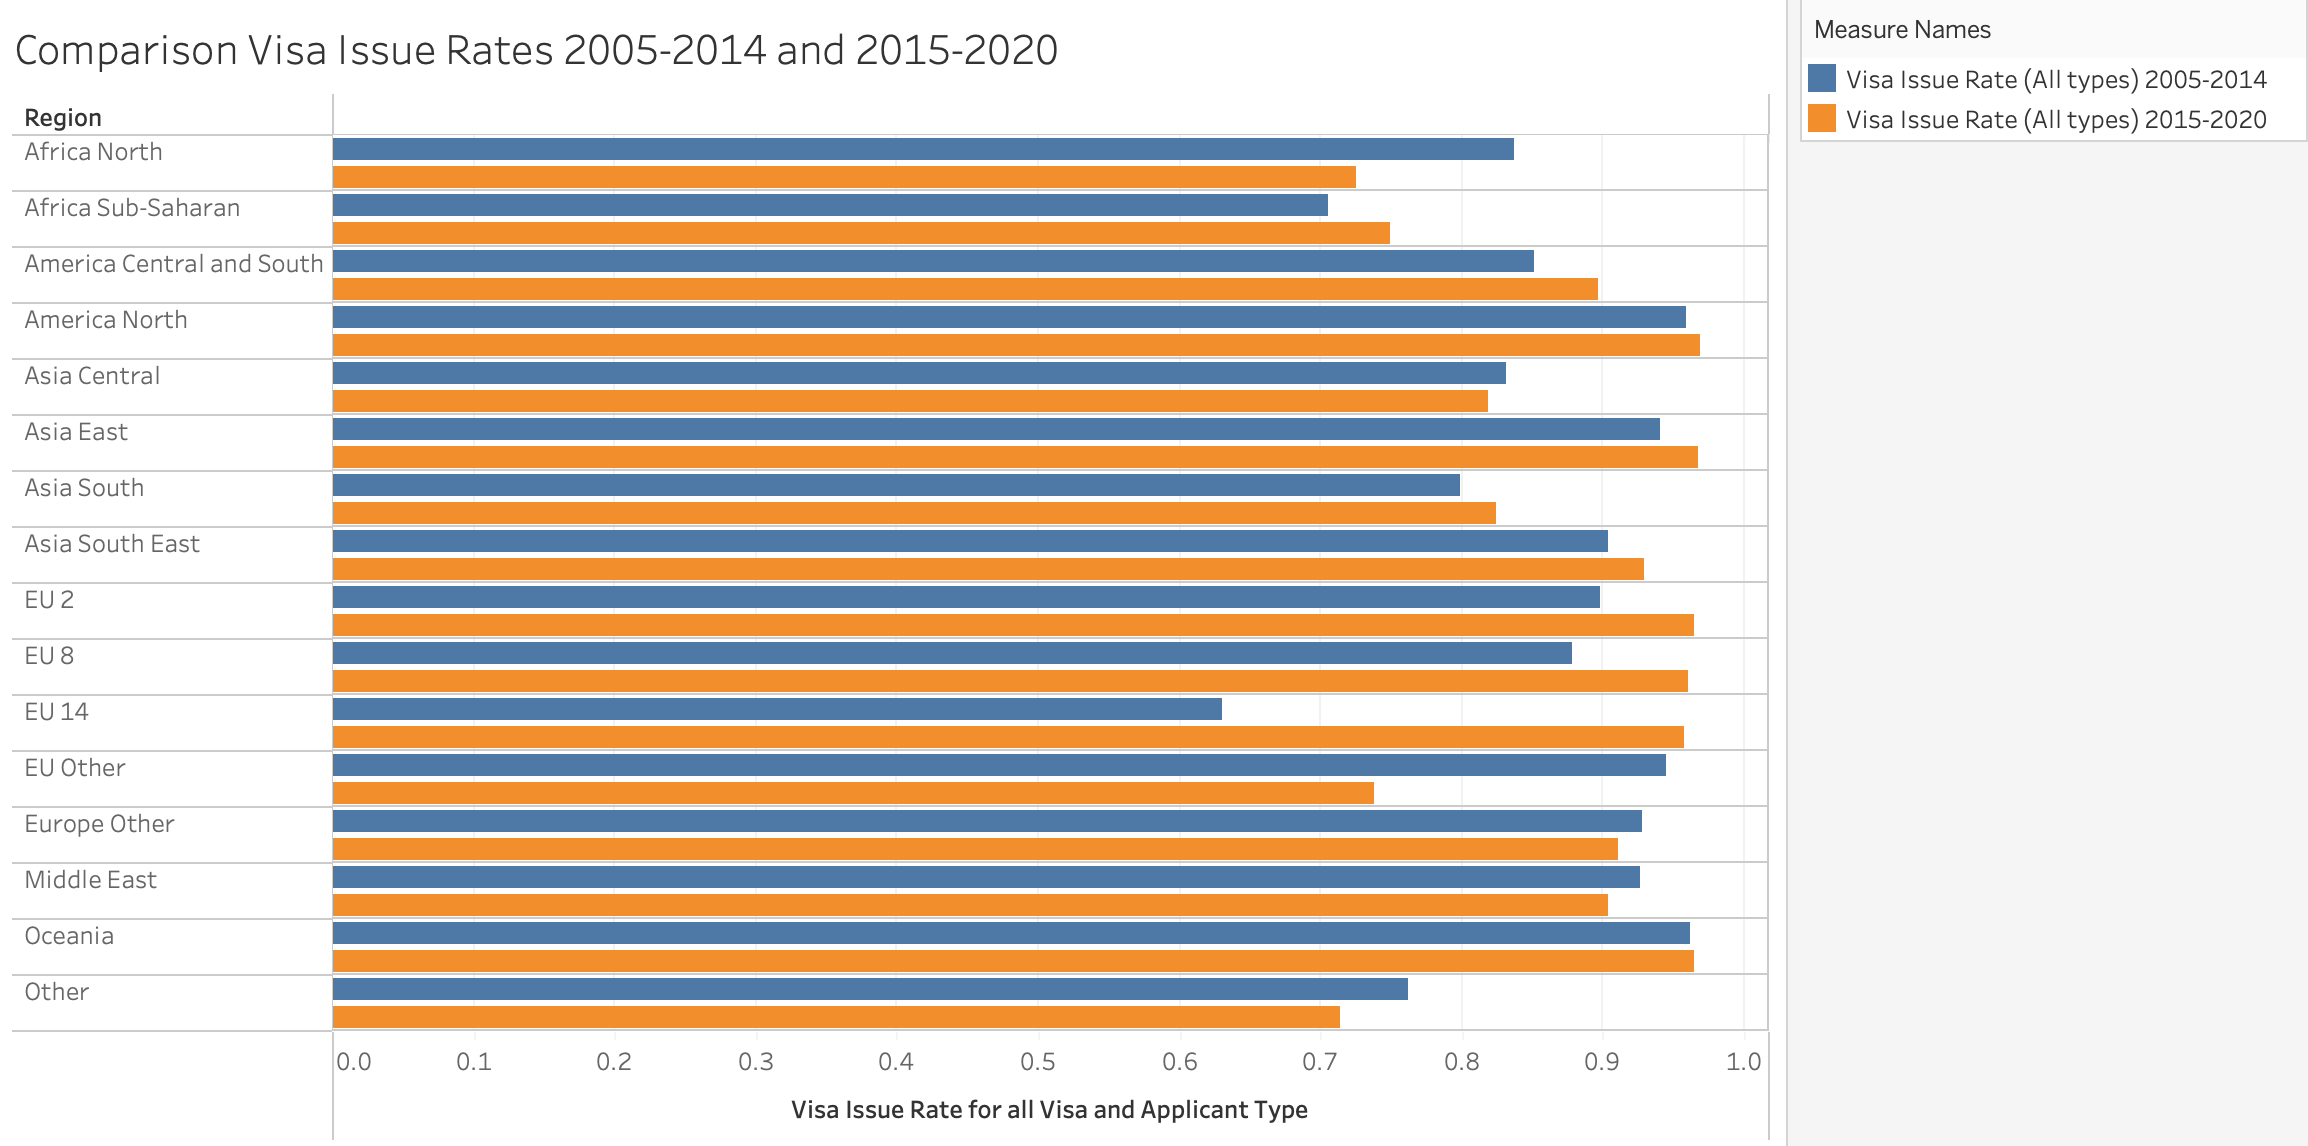

In [ ]:
#LET'S FOCUS OUR ANALYSIS ON NORTHERN AFRICA

In [ ]:
#Create a new dataframe that contains only the data from 2005 to 2021 regarding Africa
new1 = pd.DataFrame(data=UK_Visa_System, columns=["Year", "Nationality", "Region", "Decisions", "ISSUED", "REFUSED"])
UK_Visa_System_Africa = new1.loc[(new1["Region"]=="Africa North")]
UK_Visa_System_Africa.head()

,Year,Nationality,Region,Decisions,ISSUED,REFUSED
57,2005,Algeria,Africa North,2,0,1
58,2005,Algeria,Africa North,3,1,0
59,2005,Algeria,Africa North,1,0,1
60,2005,Algeria,Africa North,78,1,0
61,2005,Algeria,Africa North,31,0,1


In [ ]:
#creating a new dataframe for the African df that slices the relevant data we need from 2005 to 2014
start_date = 2005
end_date = 2014

after_start_date = UK_Visa_System_Africa["Year"] >= start_date
before_end_date = UK_Visa_System_Africa["Year"] <= end_date
between_two_dates = after_start_date & before_end_date
UK_Visa_System_Africa_0514 = UK_Visa_System_Africa.loc[between_two_dates]
UK_Visa_System_Africa_0514.head()

,Year,Nationality,Region,Decisions,ISSUED,REFUSED
57,2005,Algeria,Africa North,2,0,1
58,2005,Algeria,Africa North,3,1,0
59,2005,Algeria,Africa North,1,0,1
60,2005,Algeria,Africa North,78,1,0
61,2005,Algeria,Africa North,31,0,1


In [ ]:
start_date_1 = 2015
end_date_1 = 2020

after_start_date_1 = UK_Visa_System_Africa["Year"] >= start_date_1
before_end_date_1 = UK_Visa_System_Africa["Year"] <= end_date_1
between_two_dates_1 = after_start_date_1 & before_end_date_1
UK_Visa_System_Africa_1520 = UK_Visa_System_Africa.loc[between_two_dates_1]
UK_Visa_System_Africa_1520.head()

,Year,Nationality,Region,Decisions,ISSUED,REFUSED
186750,2015,Algeria,Africa North,5,0,1
186752,2015,Algeria,Africa North,1,1,0
186753,2015,Algeria,Africa North,2,0,1
186754,2015,Algeria,Africa North,49,1,0
186755,2015,Algeria,Africa North,30,0,1


In [ ]:
#2005-2014
#Defining a new dataframe consisting in 1 decision per row keeping the index number (this will help us to deal with the fact that the decisions are summed)
UK_Visa_System_Africa_0514_1 = pd.DataFrame(data = {'index' : UK_Visa_System_Africa_0514.index.repeat(UK_Visa_System_Africa_0514['Decisions'])})
#UK_Visa_System_Africa_0514_temp without the column "Decisions"
UK_Visa_System_Africa_0514_temp = UK_Visa_System_Africa_0514.drop(columns="Decisions").copy()
#Merging the two datasets on the index 
UK_Visa_System_Africa_0514_1 = UK_Visa_System_Africa_0514_1.merge(UK_Visa_System_Africa_0514_temp, left_on='index', right_index =True , how='left' )
#We don't need the index column anymore:
UK_Visa_System_Africa_0514_1 = UK_Visa_System_Africa_0514_1.drop(columns='index')
UK_Visa_System_Africa_0514_1.head()

,Year,Nationality,Region,ISSUED,REFUSED
0,2005,Algeria,Africa North,0,1
1,2005,Algeria,Africa North,0,1
2,2005,Algeria,Africa North,1,0
3,2005,Algeria,Africa North,1,0
4,2005,Algeria,Africa North,1,0


In [ ]:
#calculate directly the Visa Issue Rate for every type of Visa and Applicant in North Africa in 2004-2015 with a for loop
for nationality in UK_Visa_System_Africa_0514_1["Nationality"].unique():
  print(nationality)
  print(UK_Visa_System_Africa_0514_1[(UK_Visa_System_Africa_0514_1["Nationality"]==nationality) & (UK_Visa_System_Africa_0514_1["ISSUED"]==1)].shape[0]/UK_Visa_System_Africa_0514_1[UK_Visa_System_Africa_0514_1["Nationality"]==nationality].shape[0])

Algeria
0.7421508523988338
Egypt
0.8818471162816222
Libya
0.8165184348121388
Mauritania
0.8456178951228456
Morocco
0.887535151856018
Sudan
0.7628006516114607
Tunisia
0.8757442637234969


In [ ]:
#2015-2020
#Defining a new dataframe consisting in 1 decision per row keeping the index number (this will help us to deal with the fact that the decisions are summed)
UK_Visa_System_Africa_1520_1 = pd.DataFrame(data = {'index' : UK_Visa_System_Africa_1520.index.repeat(UK_Visa_System_Africa_1520['Decisions'])})
#UK_Visa_System_Africa_1520_temp without the column "Decisions"
UK_Visa_System_Africa_1520_temp = UK_Visa_System_Africa_1520.drop(columns="Decisions").copy()
#Merging the two datasets on the index 
UK_Visa_System_Africa_1520_1 = UK_Visa_System_Africa_1520_1.merge(UK_Visa_System_Africa_1520_temp, left_on='index', right_index =True , how='left' )
#We don't need the index column anymore:
UK_Visa_System_Africa_1520_1 = UK_Visa_System_Africa_1520_1.drop(columns='index')
UK_Visa_System_Africa_1520_1.head()

,Year,Nationality,Region,ISSUED,REFUSED
0,2015,Algeria,Africa North,0,1
1,2015,Algeria,Africa North,0,1
2,2015,Algeria,Africa North,0,1
3,2015,Algeria,Africa North,0,1
4,2015,Algeria,Africa North,0,1


In [ ]:
#calculate directly the Visa Issue Rate for every type of Visa and Applicant in North Africa in 2015-2021 with a for loop
for nationality in UK_Visa_System_Africa_1520_1["Nationality"].unique():
  print(nationality)
  print(UK_Visa_System_Africa_1520_1[(UK_Visa_System_Africa_1520_1["Nationality"]==nationality) & (UK_Visa_System_Africa_1520_1["ISSUED"]==1)].shape[0]/UK_Visa_System_Africa_1520_1[UK_Visa_System_Africa_1520_1["Nationality"]==nationality].shape[0])

Algeria
0.5732144566249715
Egypt
0.7975228050612523
Libya
0.5726683994889643
Mauritania
0.8047785547785548
Morocco
0.800799331998411
Sudan
0.5961437946454498
Tunisia
0.7793706991123965


In [ ]:
#Here is the comparison of the Visa Issue Rates of 2005-2014 and 2015-2020 on all Types of Visa clustered by Region FOR NORTH AFRICA BY COUNTRY
Comparison_UKVisaIssue_NorthAfrica_051520 = pd.read_excel("North Africa Visa Issue Rate.xlsx")
Comparison_UKVisaIssue_NorthAfrica_051520

,Nation in North Africa,Visa Issue Rate (All types) 2005-2014,Visa Issue Rate (All types) 2015-2020
0,Algeria,0.742151,0.573214
1,Egypt,0.881847,0.797523
2,Libya,0.816518,0.572668
3,Mauritania,0.845618,0.804779
4,Morocco,0.887535,0.800799
5,Sudan,0.762801,0.596144
6,Tunisia,0.875744,0.779371


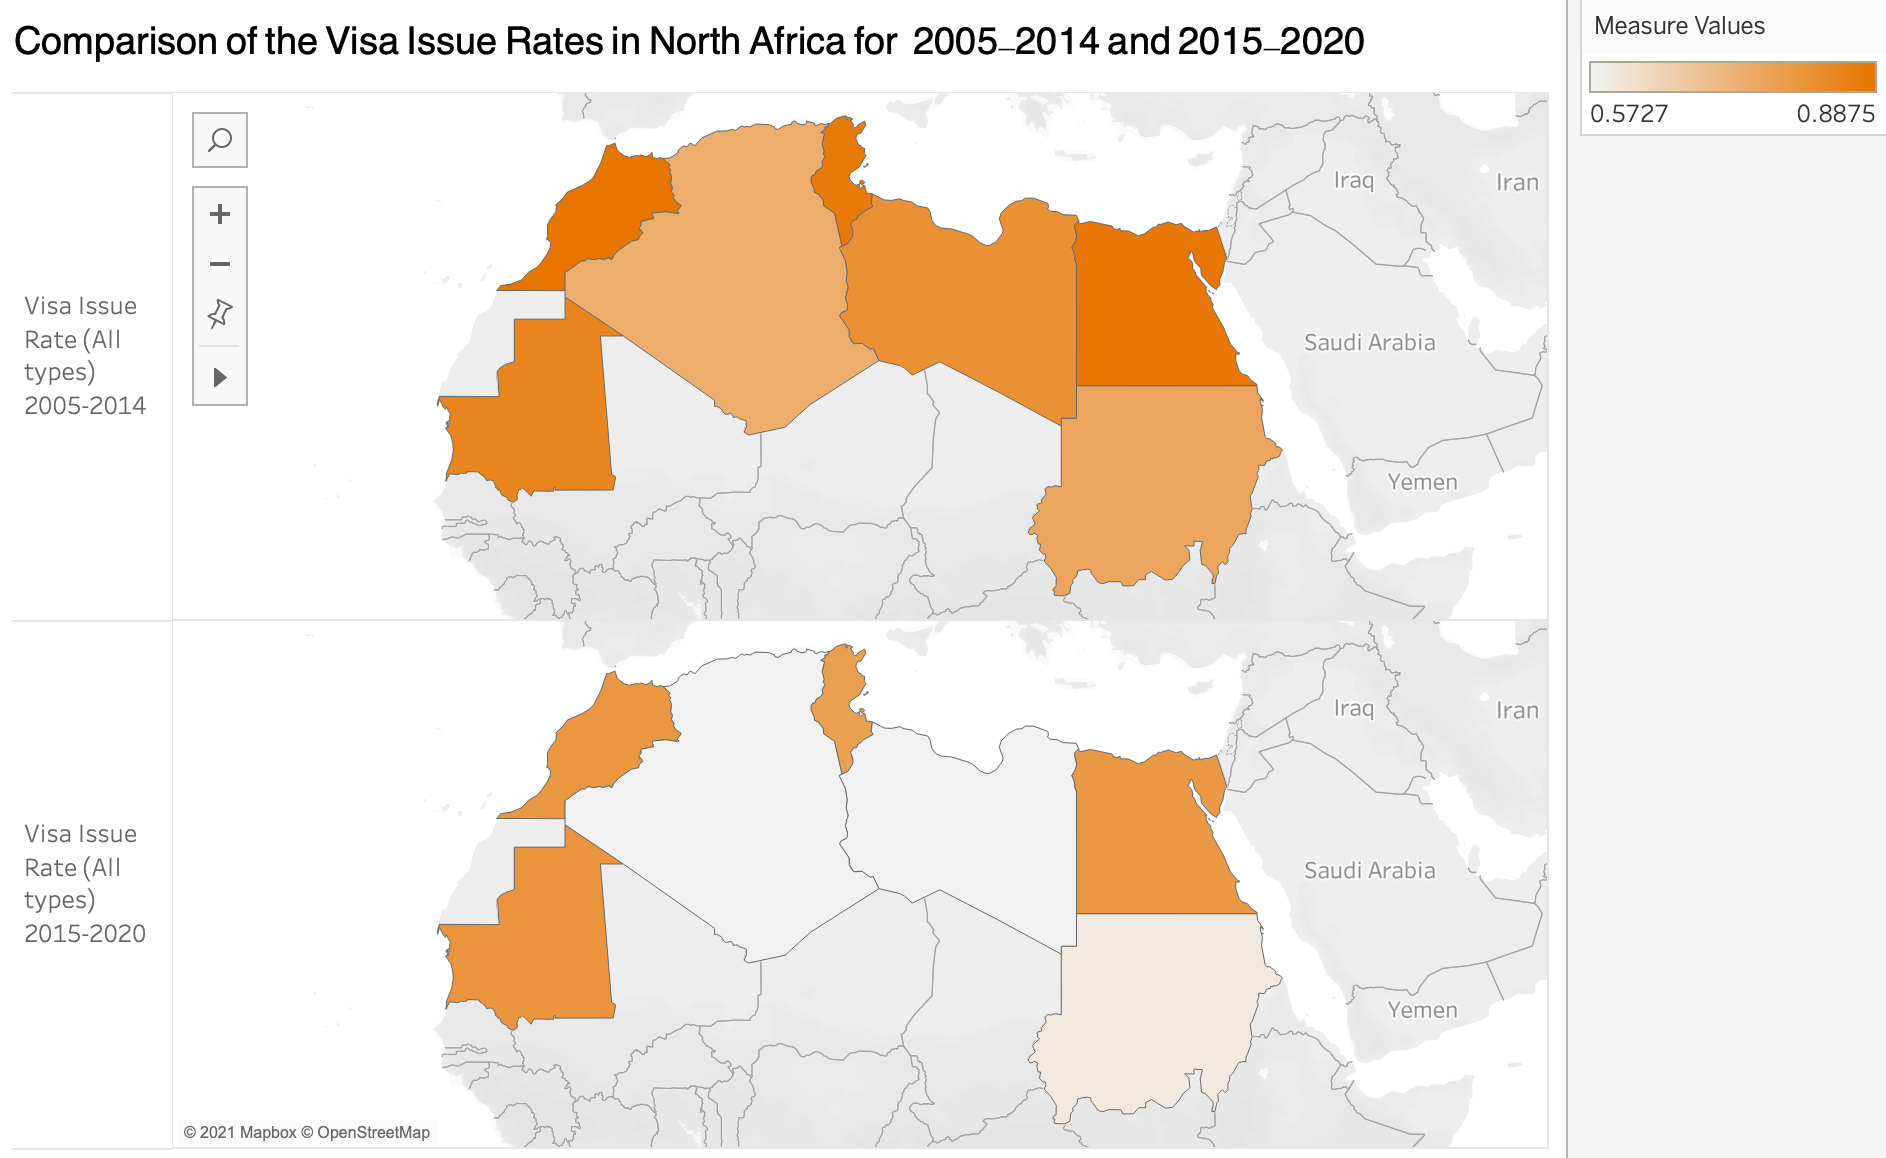

Now we will:


*   1) Conduct an analysis for North Africa regarding the Visa Type Issue Rate in 2005-2014 and 2015-2020 in comparison
*   2) Conduct an analysis for North Africa regarding the Applicant Type Issue Rate in 2005-2014 and 2015-2020 in comparison
*   3) Conduct analysis for single country in North Africa - let's ask Beatrice (?)






**1) Conduct an analysis for North Africa regarding the Visa Type Issue Rate in 2005-2014 and 2015-2020 and analyze if there was some significant changes after the introduction of the algorithm**

In [ ]:
#VISA TYPE IN NORTH AFRICA
#Create a new dataframe that contains only the data from 2005 to 2021 regarding Africa
new_1 = pd.DataFrame(data=UK_Visa_System, columns=["Year", "Region", "Visa type", "Decisions", "ISSUED", "REFUSED"])
UK_Visa_System_Africa_2 = new_1.loc[(new_1["Region"]=="Africa North")]
UK_Visa_System_Africa_2.head()

,Year,Region,Visa type,Decisions,ISSUED,REFUSED
57,2005,Africa North,Family,2,0,1
58,2005,Africa North,Family,3,1,0
59,2005,Africa North,Family,1,0,1
60,2005,Africa North,Family,78,1,0
61,2005,Africa North,Family,31,0,1


In [ ]:
#This time we will do this passage for the dataframe before slicing into according the Years
#Defining a new dataframe consisting in 1 decision per row keeping the index number (this will help us to deal with the fact that the decisions are summed)
UK_Visa_System_Africa_D = pd.DataFrame(data = {'index' : UK_Visa_System_Africa_2.index.repeat(UK_Visa_System_Africa_2['Decisions'])})
#UK_Visa_System_Africa_2_temp without the column "Decisions"
UK_Visa_System_Africa_2_temp = UK_Visa_System_Africa_2.drop(columns="Decisions").copy()
#Merging the two datasets on the index 
UK_Visa_System_Africa_D = UK_Visa_System_Africa_D.merge(UK_Visa_System_Africa_2_temp, left_on='index', right_index =True , how='left' )
#We don't need the index column anymore:
UK_Visa_System_Africa_D = UK_Visa_System_Africa_D.drop(columns='index')
UK_Visa_System_Africa_D.head()

,Year,Region,Visa type,ISSUED,REFUSED
0,2005,Africa North,Family,0,1
1,2005,Africa North,Family,0,1
2,2005,Africa North,Family,1,0
3,2005,Africa North,Family,1,0
4,2005,Africa North,Family,1,0


In [ ]:
#Now we slice it up as we have done before -> 2005-2014 
start_date = 2005
end_date = 2014

after_start_date_D = UK_Visa_System_Africa_D["Year"] >= start_date
before_end_date_D = UK_Visa_System_Africa_D["Year"] <= end_date
between_two_dates_D = after_start_date_D & before_end_date_D
UK_Visa_System_Africa_VisaT_0514 = UK_Visa_System_Africa_D.loc[between_two_dates_D]
UK_Visa_System_Africa_VisaT_0514.tail(10)

,Year,Region,Visa type,ISSUED,REFUSED
995923,2014,Africa North,Skilled worker,1,0
995924,2014,Africa North,Skilled worker,1,0
995925,2014,Africa North,Skilled worker,1,0
995926,2014,Africa North,Temporary worker,1,0
995927,2014,Africa North,Temporary worker,1,0
995928,2014,Africa North,Temporary worker,1,0
995929,2014,Africa North,Temporary worker,1,0
995930,2014,Africa North,Temporary worker,1,0
995931,2014,Africa North,Temporary worker,1,0
995932,2014,Africa North,Temporary worker,1,0


In [ ]:
#Now we slice it up as we have done before -> 2005-2014 
start_date = 2015
end_date = 2020

after_start_date_D1 = UK_Visa_System_Africa_D["Year"] >= start_date
before_end_date_D1 = UK_Visa_System_Africa_D["Year"] <= end_date
between_two_dates_D1 = after_start_date_D1 & before_end_date_D1
UK_Visa_System_Africa_VisaT_1520 = UK_Visa_System_Africa_D.loc[between_two_dates_D1]
UK_Visa_System_Africa_VisaT_1520.head(10)

,Year,Region,Visa type,ISSUED,REFUSED
995933,2015,Africa North,Dep. joining or accompanying,0,1
995934,2015,Africa North,Dep. joining or accompanying,0,1
995935,2015,Africa North,Dep. joining or accompanying,0,1
995936,2015,Africa North,Dep. joining or accompanying,0,1
995937,2015,Africa North,Dep. joining or accompanying,0,1
995938,2015,Africa North,Dep. joining or accompanying,1,0
995939,2015,Africa North,Family,0,1
995940,2015,Africa North,Family,0,1
995941,2015,Africa North,Family,1,0
995942,2015,Africa North,Family,1,0


In [ ]:
#calculate directly the Visa Type Issue Rate in North Africa in 2005-2014 with a for loop
for visatype in UK_Visa_System_Africa_VisaT_0514["Visa type"].unique():
  print(visatype)
  print(UK_Visa_System_Africa_VisaT_0514[(UK_Visa_System_Africa_VisaT_0514["Visa type"]==visatype) & (UK_Visa_System_Africa_VisaT_0514["ISSUED"]==1)].shape[0]/UK_Visa_System_Africa_VisaT_0514[UK_Visa_System_Africa_VisaT_0514["Visa type"]==visatype].shape[0])

Family
0.7889148345596334
EEA family permit
0.8681958535509484
Other settlement visas
0.9023372287145242
Other temporary visas
0.9304355415902942
Visitors
0.8420121299686242
Other study
0.7584153288451579
Other work visas and exemptions
0.9105467639533782
Dep. joining or accompanying
0.8448827292110874
High value
0.8213224368499257
Skilled worker
0.9122421373013189
Temporary worker
0.8535732133933034
Sponsored study
0.8284899811801173


In [ ]:
#calculate directly the Visa Type Issue Rate in North Africa in 2015-2020 with a for loop
for visatype in UK_Visa_System_Africa_VisaT_1520["Visa type"].unique():
  print(visatype)
  print(UK_Visa_System_Africa_VisaT_1520[(UK_Visa_System_Africa_VisaT_1520["Visa type"]==visatype) & (UK_Visa_System_Africa_VisaT_1520["ISSUED"]==1)].shape[0]/UK_Visa_System_Africa_VisaT_1520[UK_Visa_System_Africa_VisaT_1520["Visa type"]==visatype].shape[0])

Dep. joining or accompanying
0.8405951115834219
Family
0.7686173078995582
EEA family permit
0.6683661907999093
Other settlement visas
0.900163666121113
Other temporary visas
0.9341018582243634
Visitors
0.7098271969282888
Other study
0.5987889029714125
Sponsored study
0.8875155006200248
High value
0.7620738636363636
Other work visas and exemptions
0.8620168702001763
Skilled worker
0.968240986846589
Temporary worker
0.9266254994551398
EU Settlement Scheme family permit
0.7676130389064143


In [ ]:
#In data manipulation analysis specify the fact that the EU Settlement Scheme family permit was introduced only in 2019

In [ ]:
#Here is the comparison of the Visa Issue Rates per Visa Type of 2005-2014 and 2015-2020 for North Africa Region
Comparison_UKVisaTypeIssue_NorthAfrica_051520 = pd.read_excel("North Africa Visa Type by Year.xlsx")
Comparison_UKVisaTypeIssue_NorthAfrica_051520

,Visa Type per North Africa,Visa Issue Rate 2005-2014,Visa Issue Rate 2015-2020
0,Family,0.788915,0.768617
1,EEA family permit,0.868196,0.668366
2,Other settlement visas,0.902337,0.900164
3,Other temporary visas,0.930436,0.934102
4,Visitors,0.842012,0.709827
5,Other study,0.758415,0.598789
6,Other work visas and exemptions,0.910547,0.862017
7,Dep. Joining and accompanying,0.844883,0.840595
8,High value,0.821322,0.762074
9,Skilled worker,0.912242,0.968241


Data visualization 
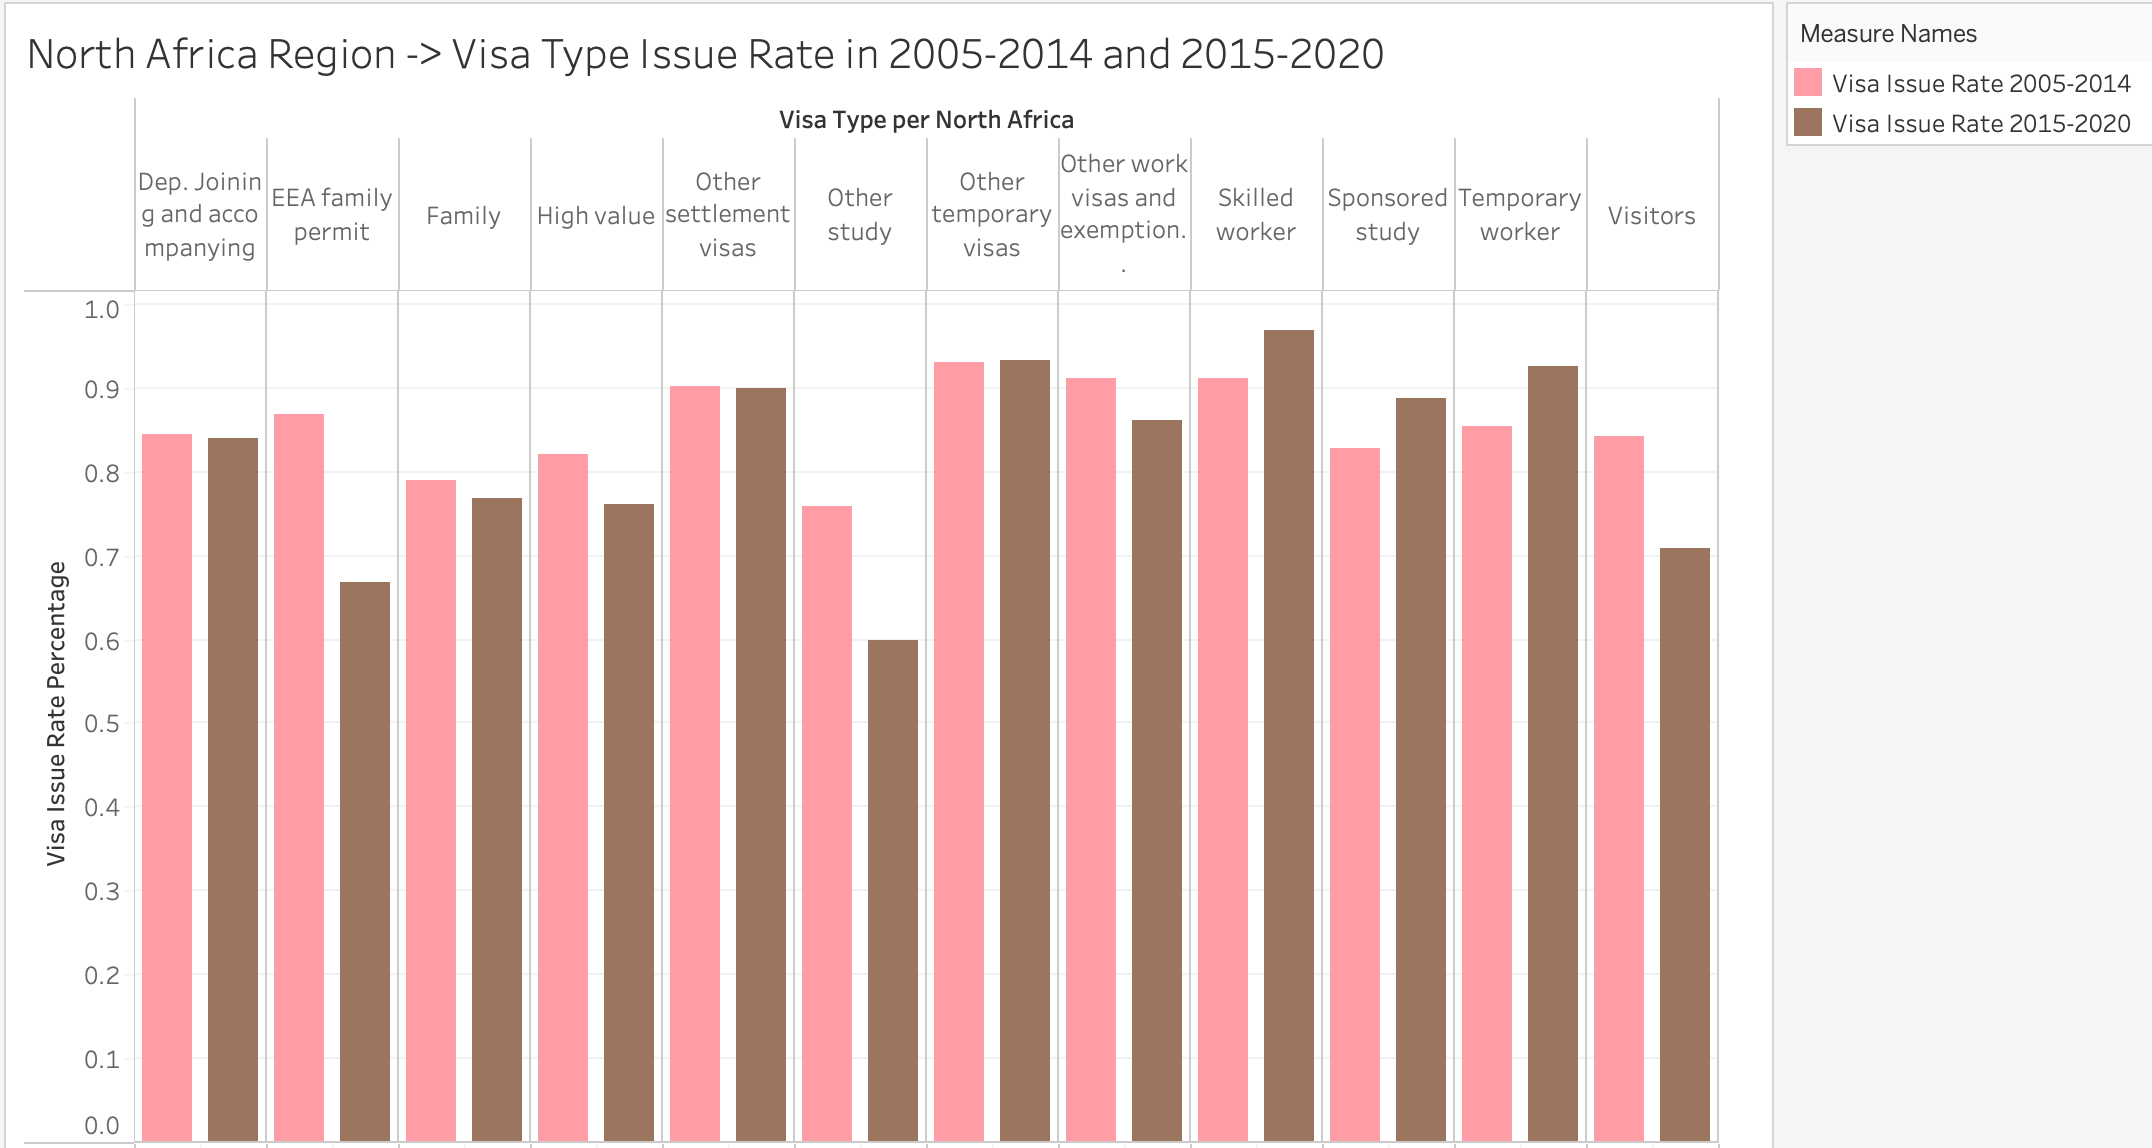

**2) Conduct an analysis for North Africa regarding the Applicant Type Visa Issue Rate in 2005-2014 and 2015-2020 and analyze if there was some significant changes after the introduction of the algorithm**

In [ ]:
#APPLICANT TYPE IN NORTH AFRICA
#Create a new dataframe that contains only the data from 2005 to 2021 regarding Africa
new_2 = pd.DataFrame(data=UK_Visa_System, columns=["Year", "Region", "Applicant type", "Decisions", "ISSUED", "REFUSED"])
UK_Visa_System_Africa_3 = new_2.loc[(new_2["Region"]=="Africa North")]
UK_Visa_System_Africa_3.head()

,Year,Region,Applicant type,Decisions,ISSUED,REFUSED
57,2005,Africa North,All,2,0,1
58,2005,Africa North,All,3,1,0
59,2005,Africa North,All,1,0,1
60,2005,Africa North,All,78,1,0
61,2005,Africa North,All,31,0,1


In [ ]:
#Defining a new dataframe consisting in 1 decision per row keeping the index number (this will help us to deal with the fact that the decisions are summed)
UK_Visa_System_Africa_D2 = pd.DataFrame(data = {'index' : UK_Visa_System_Africa_3.index.repeat(UK_Visa_System_Africa_3['Decisions'])})
#UK_Visa_System_Africa_3_temp without the column "Decisions"
UK_Visa_System_Africa_3_temp = UK_Visa_System_Africa_3.drop(columns="Decisions").copy()
#Merging the two datasets on the index 
UK_Visa_System_Africa_D2 = UK_Visa_System_Africa_D2.merge(UK_Visa_System_Africa_3_temp, left_on='index', right_index =True , how='left' )
#We don't need the index column anymore:
UK_Visa_System_Africa_D2 = UK_Visa_System_Africa_D2.drop(columns='index')
UK_Visa_System_Africa_D2.head()

,Year,Region,Applicant type,ISSUED,REFUSED
0,2005,Africa North,All,0,1
1,2005,Africa North,All,0,1
2,2005,Africa North,All,1,0
3,2005,Africa North,All,1,0
4,2005,Africa North,All,1,0


In [ ]:
#Now we slice it up as we have done before -> 2005-2014 
start_date = 2005
end_date = 2014

after_start_date_D2 = UK_Visa_System_Africa_D2["Year"] >= start_date
before_end_date_D2 = UK_Visa_System_Africa_D2["Year"] <= end_date
between_two_dates_D2 = after_start_date_D2 & before_end_date_D2
UK_Visa_System_Africa_ApplicantT_0514 = UK_Visa_System_Africa_D2.loc[between_two_dates_D2]
UK_Visa_System_Africa_ApplicantT_0514.head(10)

,Year,Region,Applicant type,ISSUED,REFUSED
0,2005,Africa North,All,0,1
1,2005,Africa North,All,0,1
2,2005,Africa North,All,1,0
3,2005,Africa North,All,1,0
4,2005,Africa North,All,1,0
5,2005,Africa North,All,0,1
6,2005,Africa North,All,1,0
7,2005,Africa North,All,1,0
8,2005,Africa North,All,1,0
9,2005,Africa North,All,1,0


In [ ]:
#Now we slice it up as we have done before -> 2015-2020
start_date = 2015
end_date = 2020

after_start_date_D2_1 = UK_Visa_System_Africa_D2["Year"] >= start_date
before_end_date_D2_1 = UK_Visa_System_Africa_D2["Year"] <= end_date
between_two_dates_D2_1 = after_start_date_D2_1 & before_end_date_D2_1
UK_Visa_System_Africa_ApplicantT_1520 = UK_Visa_System_Africa_D2.loc[between_two_dates_D2_1]
UK_Visa_System_Africa_ApplicantT_1520.tail(10)

,Year,Region,Applicant type,ISSUED,REFUSED
1629559,2020,Africa North,Dependant,1,0
1629560,2020,Africa North,Dependant,1,0
1629561,2020,Africa North,Main applicant,1,0
1629562,2020,Africa North,Main applicant,1,0
1629563,2020,Africa North,Main applicant,1,0
1629564,2020,Africa North,Main applicant,1,0
1629565,2020,Africa North,Main applicant,1,0
1629566,2020,Africa North,Main applicant,1,0
1629567,2020,Africa North,Main applicant,1,0
1629568,2020,Africa North,Main applicant,1,0


In [ ]:
#calculate directly the Applicant Type Visa Issue Rate in North Africa in 2005-2014 with a for loop
for appl_type in UK_Visa_System_Africa_ApplicantT_0514["Applicant type"].unique():
  print(appl_type)
  print(UK_Visa_System_Africa_ApplicantT_0514[(UK_Visa_System_Africa_ApplicantT_0514["Applicant type"]==appl_type) & (UK_Visa_System_Africa_ApplicantT_0514["ISSUED"]==1)].shape[0]/UK_Visa_System_Africa_ApplicantT_0514[UK_Visa_System_Africa_ApplicantT_0514["Applicant type"]==appl_type].shape[0])

All
0.8419862220761216
Main applicant
0.7664988410694424
Dependant
0.9285566047525163


In [ ]:
#calculate directly the Applicant Type Visa Issue Rate in North Africa in 2015-2020 with a for loop
for appl_type in UK_Visa_System_Africa_ApplicantT_1520["Applicant type"].unique():
  print(appl_type)
  print(UK_Visa_System_Africa_ApplicantT_1520[(UK_Visa_System_Africa_ApplicantT_1520["Applicant type"]==appl_type) & (UK_Visa_System_Africa_ApplicantT_1520["ISSUED"]==1)].shape[0]/UK_Visa_System_Africa_ApplicantT_1520[UK_Visa_System_Africa_ApplicantT_1520["Applicant type"]==appl_type].shape[0])

Dependant
0.9048894382639747
All
0.7136640147200244
Main applicant
0.7744428334404568


In [ ]:
#Here is the comparison of the Visa Issue Rates per Applicant Type of 2005-2014 and 2015-2020 for the North African Region
Comparison_UKApplicantType_VisaIssue_NorthAfrica_051520 = pd.read_excel("North Africa Applicant Type 05 15 20.xlsx")
Comparison_UKApplicantType_VisaIssue_NorthAfrica_051520

,North Africa Applicant Type,Visa Issue Rate 2005-2014,Visa Issue Rate 2015-2020
0,All,0.841986,0.904889
1,Main applicant,0.766499,0.713664
2,Dependant,0.928557,0.774443


Data visualization
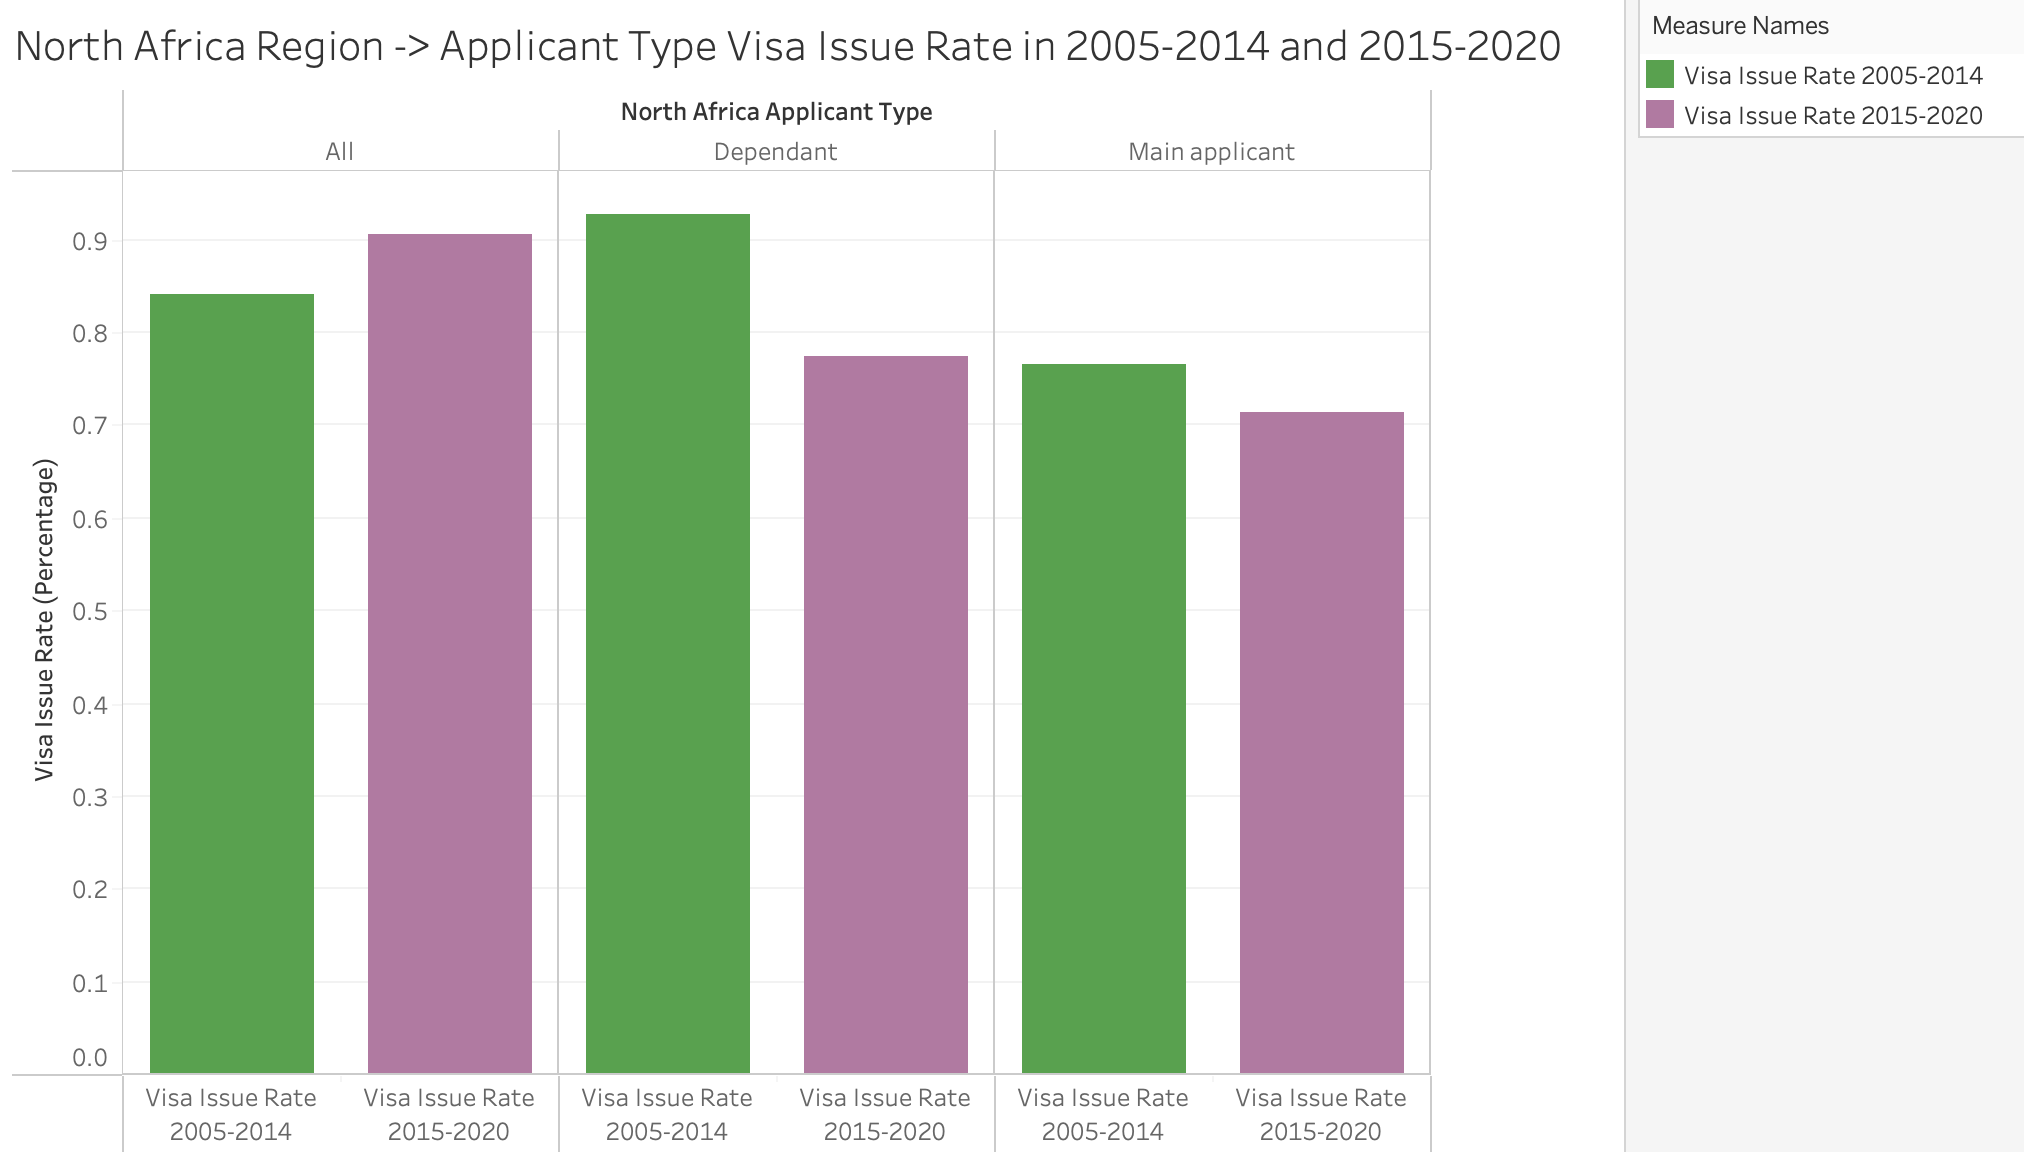

**3) Conduct analysis for single country in North Africa - let's ask Beatrice (?)**

# **ANALYSIS ON VISA TYPE (for all Regions)**


In [ ]:
#Sum of decisions by Visa type
UK_Visa_System.groupby('Visa type')['Decisions'].sum().sort_values(ascending=False)

Visa type
Visitors                              31395625
Sponsored study                        3230869
Other study                            2456582
Other work visas and exemptions        1409204
Skilled worker                         1071307
Family                                 1007215
Other temporary visas                   696712
EEA family permit                       622235
Temporary worker                        519060
Dep. joining or accompanying            334252
High value                              204637
Other settlement visas                   95417
EU Settlement Scheme family permit       91443
Name: Decisions, dtype: int64

In [ ]:
#ONLY ISSUED VISA
UK_Visa_System_Issued.groupby('Visa type')['Decisions'].sum().sort_values(ascending=False)

Visa type
Visitors                              26976335
Sponsored study                        2913744
Other study                            1906265
Other work visas and exemptions        1195538
Skilled worker                         1040918
Family                                  787476
Other temporary visas                   653737
Temporary worker                        495507
EEA family permit                       418426
Dep. joining or accompanying            277970
High value                              169058
Other settlement visas                   72741
EU Settlement Scheme family permit       65064
Name: Decisions, dtype: int64

In [ ]:
Visa_Type_Data = [["Visitors", 31395625, 26976335], ["Sponsored study", 3230869, 2913744], ["Other study", 2456582, 1906265], ["Other work visas and exemptions", 1409204, 1195538], ["Skilled worker", 1071307, 1040918], ["Family", 1007215, 787476], ["Other temporary visas", 696712, 653737], ["EEA family permit", 622235, 418426], ["Temporary worker", 519060, 495507], ["Dep. joining or accompanying", 334252, 277970], ["High value", 204637, 169058], ["Other settlement visas", 95417, 72741], ["EU Settlement Scheme family permit", 91443, 65064]]

In [ ]:
#Create a new dataframe that puts together the Visa type, The total of decision, and the Number of Issued Visa
VisaType_Issued_df = pd.DataFrame(Visa_Type_Data, columns = ["Visa Type", "Total Decision", "Issued Visa"])
VisaType_Issued_df

,Visa Type,Total Decision,Issued Visa
0,Visitors,31395625,26976335
1,Sponsored study,3230869,2913744
2,Other study,2456582,1906265
3,Other work visas and exemptions,1409204,1195538
4,Skilled worker,1071307,1040918
5,Family,1007215,787476
6,Other temporary visas,696712,653737
7,EEA family permit,622235,418426
8,Temporary worker,519060,495507
9,Dep. joining or accompanying,334252,277970


In [ ]:
#Now we calculate the Issued Visa percentage in a new column
VisaType_Issued_df['Visa Issue Percentage'] = VisaType_Issued_df['Issued Visa']  / VisaType_Issued_df['Total Decision'] * 100 
VisaType_Issued_df.sort_values("Visa Issue Percentage", ascending=False)

,Visa Type,Total Decision,Issued Visa,Visa Issue Percentage
4,Skilled worker,1071307,1040918,97.163371
8,Temporary worker,519060,495507,95.462374
6,Other temporary visas,696712,653737,93.831741
1,Sponsored study,3230869,2913744,90.184529
0,Visitors,31395625,26976335,85.923867
3,Other work visas and exemptions,1409204,1195538,84.837823
9,Dep. joining or accompanying,334252,277970,83.161806
10,High value,204637,169058,82.613604
5,Family,1007215,787476,78.183506
2,Other study,2456582,1906265,77.598265


In [ ]:
VisaType_Issued_df.to_csv("VisaType_Issued.csv")

**Do data visualization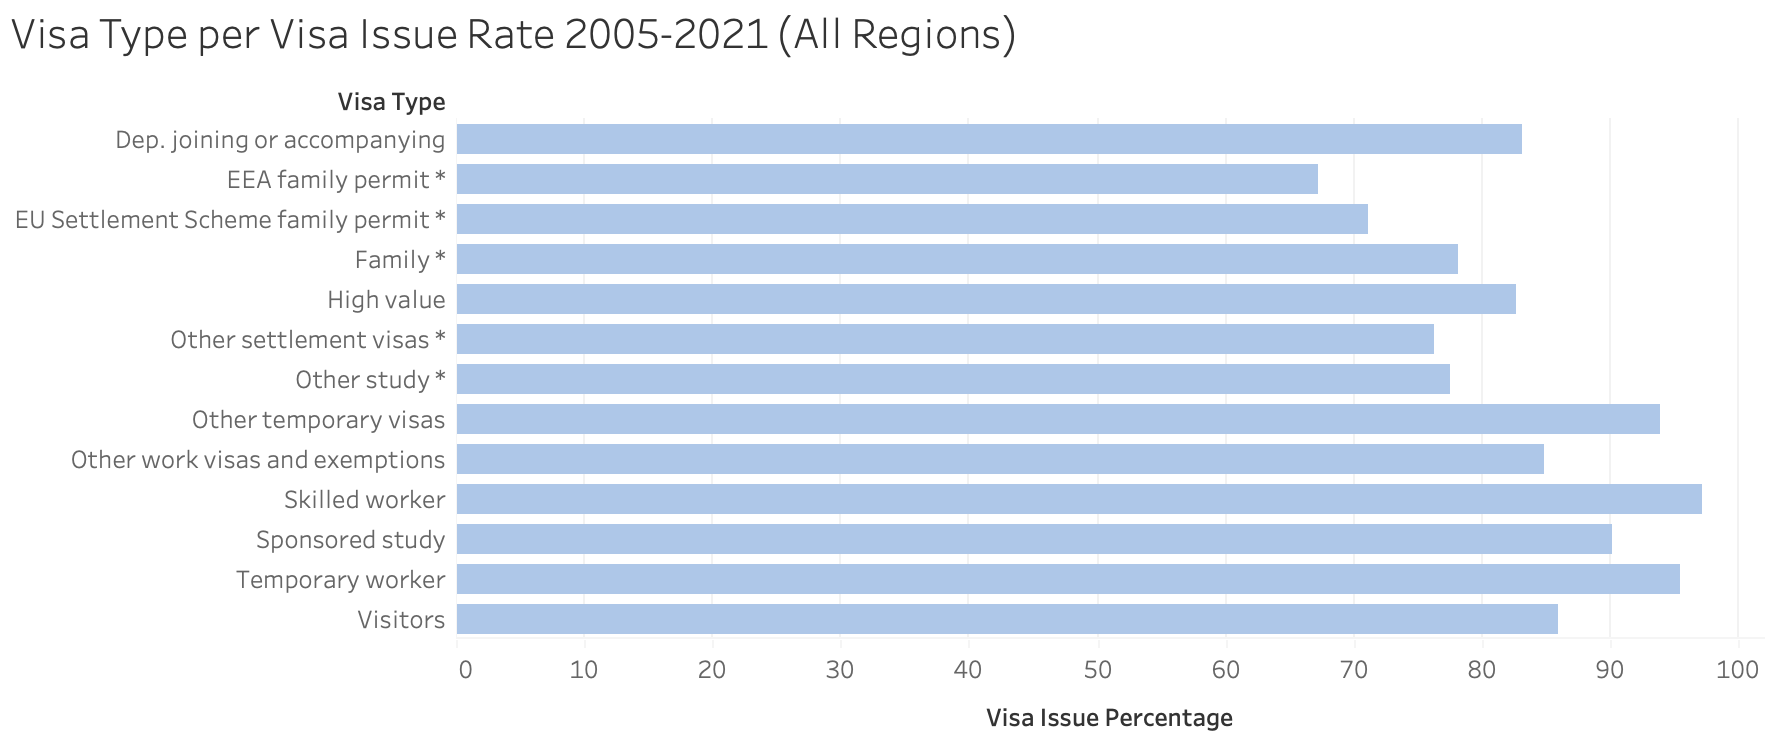**

In [ ]:
#We proceed with the same analysis we have done for the Nationality by clustering the data in time span: 2005-2014 and 2015-2020

In [ ]:
UK_Visa_System

,Year,Nationality,Region,Visa type,Applicant type,Case outcome,Decisions,ISSUED,REFUSED
0,2005,Afghanistan,Asia Central,Dep. joining or accompanying,Dependant,Issued,87,1,0
1,2005,Afghanistan,Asia Central,Dep. joining or accompanying,Dependant,Refused,17,0,1
3,2005,Afghanistan,Asia Central,Family,All,Issued,2,1,0
4,2005,Afghanistan,Asia Central,Family,All,Refused,4,0,1
5,2005,Afghanistan,Asia Central,Family,All,Issued,205,1,0
...,...,...,...,...,...,...,...,...,...
295837,2021,Zimbabwe,Africa Sub-Saharan,Skilled worker,Main applicant,Issued,1,1,0
295838,2021,Zimbabwe,Africa Sub-Saharan,Temporary worker,Main applicant,Issued,8,1,0
295839,2021,Zimbabwe,Africa Sub-Saharan,Temporary worker,Main applicant,Issued,1,1,0
295840,2021,Zimbabwe,Africa Sub-Saharan,Temporary worker,Main applicant,Issued,1,1,0


In [ ]:
#Create a new dataframe that contains only the data from 2005 to 2021 according to the Visa Type
new2 = pd.DataFrame(data=UK_Visa_System, columns=["Year", "Visa type", "Decisions", "ISSUED", "REFUSED"])
new2

,Year,Visa type,Decisions,ISSUED,REFUSED
0,2005,Dep. joining or accompanying,87,1,0
1,2005,Dep. joining or accompanying,17,0,1
3,2005,Family,2,1,0
4,2005,Family,4,0,1
5,2005,Family,205,1,0
...,...,...,...,...,...
295837,2021,Skilled worker,1,1,0
295838,2021,Temporary worker,8,1,0
295839,2021,Temporary worker,1,1,0
295840,2021,Temporary worker,1,1,0


In [ ]:
#creating a new dataframe that slices the relevant data we need from 2005 to 2014
start_date_2 = 2005
end_date_2 = 2014

after_start_date_2 = new2["Year"] >= start_date_2
before_end_date_2 = new2["Year"] <= end_date_2
between_two_dates_2 = after_start_date_2 & before_end_date_2
UK_Visa_System_VisaType_0514 = new2.loc[between_two_dates_2]
UK_Visa_System_VisaType_0514

,Year,Visa type,Decisions,ISSUED,REFUSED
0,2005,Dep. joining or accompanying,87,1,0
1,2005,Dep. joining or accompanying,17,0,1
3,2005,Family,2,1,0
4,2005,Family,4,0,1
5,2005,Family,205,1,0
...,...,...,...,...,...
186675,2014,Temporary worker,2,1,0
186676,2014,Temporary worker,1,0,1
186677,2014,Temporary worker,27,1,0
186679,2014,Temporary worker,2,0,1


In [ ]:
#creating a new dataframe that slices the relevant data we need from 2015 to 2020
start_date_3 = 2015
end_date_3 = 2020

after_start_date_3 = new2["Year"] >= start_date_3
before_end_date_3 = new2["Year"] <= end_date_3
between_two_dates_3 = after_start_date_3 & before_end_date_3
UK_Visa_System_VisaType_1520 = new2.loc[between_two_dates_3]
UK_Visa_System_VisaType_1520

,Year,Visa type,Decisions,ISSUED,REFUSED
186682,2015,Dep. joining or accompanying,43,1,0
186683,2015,Dep. joining or accompanying,60,0,1
186684,2015,Dep. joining or accompanying,5,0,1
186685,2015,Dep. joining or accompanying,3,1,0
186686,2015,Family,49,1,0
...,...,...,...,...,...
286342,2020,Temporary worker,3,1,0
286343,2020,Temporary worker,2,1,0
286344,2020,Temporary worker,4,1,0
286345,2020,Temporary worker,1,1,0


In [ ]:
#2005-2014
#Defining a new dataframe consisting in 1 decision per row keeping the index number (this will help us to deal with the fact that the decisions are summed)
UK_Visa_System_VisaType_0514_1 = pd.DataFrame(data = {'index' : UK_Visa_System_VisaType_0514.index.repeat(UK_Visa_System_VisaType_0514['Decisions'])})
#UK_Visa_System_VisaType_0514_temp without the column "Decisions"
UK_Visa_System_VisaType_0514_temp = UK_Visa_System_VisaType_0514.drop(columns="Decisions").copy()
#Merging the two datasets on the index 
UK_Visa_System_VisaType_0514_1 = UK_Visa_System_VisaType_0514_1.merge(UK_Visa_System_VisaType_0514_temp, left_on='index', right_index =True , how='left' )
#We don't need the index column anymore:
UK_Visa_System_VisaType_0514_1 = UK_Visa_System_VisaType_0514_1.drop(columns='index')
UK_Visa_System_VisaType_0514_1.head()

,Year,Visa type,ISSUED,REFUSED
0,2005,Dep. joining or accompanying,1,0
1,2005,Dep. joining or accompanying,1,0
2,2005,Dep. joining or accompanying,1,0
3,2005,Dep. joining or accompanying,1,0
4,2005,Dep. joining or accompanying,1,0


In [ ]:
#calculate directly the Visa Issue Rate for every type of Visa in 2004-2015 with a for loop
for visatype in UK_Visa_System_VisaType_0514_1["Visa type"].unique():
  print(visatype)
  print(UK_Visa_System_VisaType_0514_1[(UK_Visa_System_VisaType_0514_1["Visa type"]==visatype) & (UK_Visa_System_VisaType_0514_1["ISSUED"]==1)].shape[0]/UK_Visa_System_VisaType_0514_1[UK_Visa_System_VisaType_0514_1["Visa type"]==visatype].shape[0])

Dep. joining or accompanying
0.842577596555075
Family
0.781764322167223
EEA family permit
0.8482828446773402
Other settlement visas
0.8658822762531777
Other temporary visas
0.9305991667966989
Visitors
0.8549934298256293
Other study
0.7409284253665761
Other work visas and exemptions
0.857891141159214
High value
0.8307432412122232
Skilled worker
0.9550884174420456
Temporary worker
0.9449383858694984
Sponsored study
0.8441712923918697


In [ ]:
#2015-2020
#Defining a new dataframe consisting in 1 decision per row keeping the index number (this will help us to deal with the fact that the decisions are summed)
UK_Visa_System_VisaType_1520_1 = pd.DataFrame(data = {'index' : UK_Visa_System_VisaType_1520.index.repeat(UK_Visa_System_VisaType_1520['Decisions'])})
#UK_Visa_System_VisaType_1520_temp without the column "Decisions"
UK_Visa_System_VisaType_1520_temp = UK_Visa_System_VisaType_1520.drop(columns="Decisions").copy()
#Merging the two datasets on the index 
UK_Visa_System_VisaType_1520_1 = UK_Visa_System_VisaType_1520_1.merge(UK_Visa_System_VisaType_1520_temp, left_on='index', right_index =True , how='left' )
#We don't need the index column anymore:
UK_Visa_System_VisaType_1520_1 = UK_Visa_System_VisaType_1520_1.drop(columns='index')
UK_Visa_System_VisaType_1520_1.head()

,Year,Visa type,ISSUED,REFUSED
0,2015,Dep. joining or accompanying,1,0
1,2015,Dep. joining or accompanying,1,0
2,2015,Dep. joining or accompanying,1,0
3,2015,Dep. joining or accompanying,1,0
4,2015,Dep. joining or accompanying,1,0


In [ ]:
#calculate directly the Visa Issue Rate for every type of Visa in 2015-2020 with a for loop
for visatype in UK_Visa_System_VisaType_1520_1["Visa type"].unique():
  print(visatype)
  print(UK_Visa_System_VisaType_1520_1[(UK_Visa_System_VisaType_1520_1["Visa type"]==visatype) & (UK_Visa_System_VisaType_1520_1["ISSUED"]==1)].shape[0]/UK_Visa_System_VisaType_1520_1[UK_Visa_System_VisaType_1520_1["Visa type"]==visatype].shape[0])

Dep. joining or accompanying
0.8492025213298519
Family
0.7768450347418869
EEA family permit
0.5759013852678625
Other settlement visas
0.5650756906582194
Other temporary visas
0.9546590173035995
Visitors
0.8680899368155366
Other study
0.8907825548487648
Sponsored study
0.9675882775031882
High value
0.7958640401266568
Skilled worker
0.9818192727709109
Other work visas and exemptions
0.8643793805769376
Temporary worker
0.9614199889013101
EU Settlement Scheme family permit
0.7111562582810705


EU Settlement Scheme family permit, it's a Visa Type I believe it was introduced only in 2019 (!!)

In [ ]:
Comparison_UKVisaIssue_VisaType_051520 = pd.read_excel("Visa Type Issue Rate.xlsx")
Comparison_UKVisaIssue_VisaType_051520

,Visa Type,Visa Issue Rate 2005-2014,Visa Issue Rate 2015-2020
0,Dep. Joining or accompanying,0.842578,0.849203
1,Family,0.781764,0.776845
2,EEA family permit,0.848283,0.575901
3,Other settlement visas,0.865882,0.565076
4,Other temporary visas,0.930599,0.954659
5,Visitors,0.854993,0.868090
6,Other study,0.740928,0.890783
7,Other work visas and exemptions,0.857891,0.864379
8,High value,0.830743,0.795864
9,Skilled worker,0.955088,0.981819


Data visualization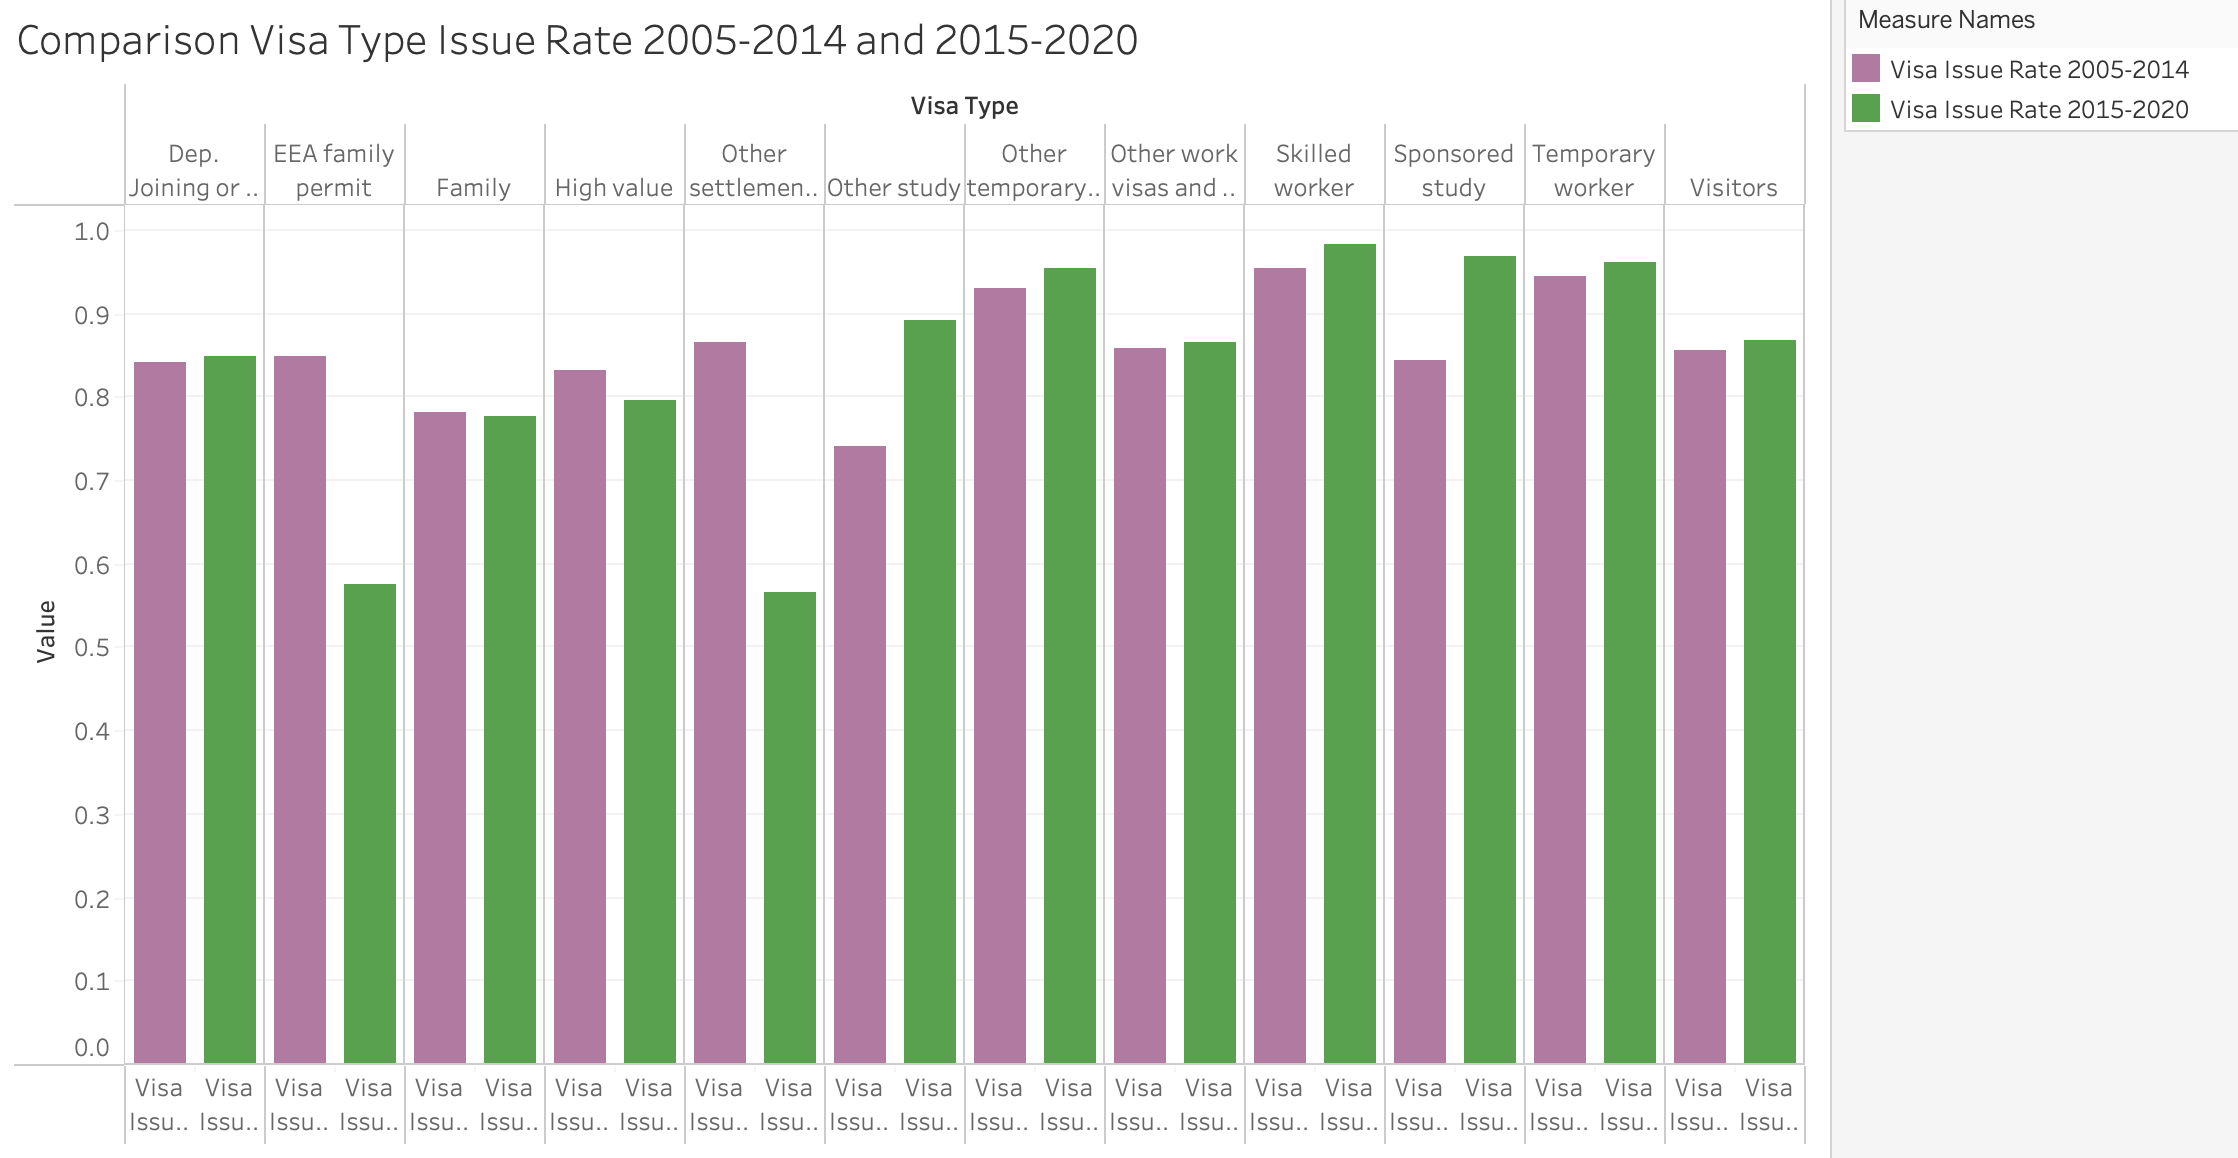

## **ANALYSIS ON APPLICANT TYPE**

In [ ]:
#Sum of Decisions by Applicant Type
UK_Visa_System.groupby('Applicant type')['Decisions'].sum().sort_values(ascending=False)

Applicant type
All               33834463
Main applicant     7756678
Dependant          1535459
Main Applicant        7958
Name: Decisions, dtype: int64

In [ ]:
UK_Visa_System_Issued['Applicant type'] = UK_Visa_System_Issued['Applicant type'].replace(['Main Applicant'],'Main applicant')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#ONLY ISSUED VISA
UK_Visa_System_Issued.groupby('Applicant type')['Decisions'].sum().sort_values(ascending=False)

Applicant type
All               28915399
Main applicant     6700513
Dependant          1356867
Name: Decisions, dtype: int64

In [ ]:
Applicant_Type_Data = [["All", 33834463, 28915399], ["Main applicant", 7764636 , 6700513], ["Dependant", 1535459, 1356867]]

In [ ]:
#Create a new dataframe that puts together the Applicant Type, The total of decision, and the Number of Issued Visa
ApplicantType_Issued_df = pd.DataFrame(Applicant_Type_Data, columns = ["Applicant Type", "Total Decision", "Issued Visa"])
ApplicantType_Issued_df

,Applicant Type,Total Decision,Issued Visa
0,All,33834463,28915399
1,Main applicant,7764636,6700513
2,Dependant,1535459,1356867


In [ ]:
#Now we calculate the Issued Visa percentage in a new column
ApplicantType_Issued_df["Visa Issue Rate"] = ApplicantType_Issued_df["Issued Visa"] / ApplicantType_Issued_df["Total Decision"] * 100
ApplicantType_Issued_df.sort_values("Visa Issue Rate", ascending=False)

,Applicant Type,Total Decision,Issued Visa,Visa Issue Rate
2,Dependant,1535459,1356867,88.368820
1,Main applicant,7764636,6700513,86.295262
0,All,33834463,28915399,85.461380


In [ ]:
ApplicantType_Issued_df.to_csv("ApplicantType_Issued.csv")

<BarContainer object of 3 artists>

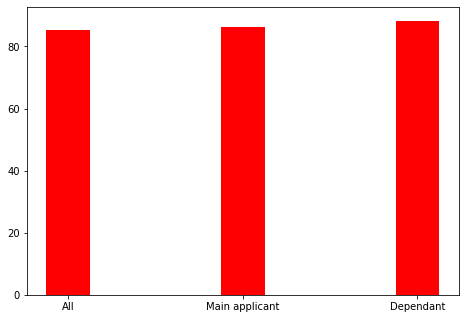

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ApplicantType_Issued_df["Applicant Type"], ApplicantType_Issued_df["Visa Issue Rate"], color = 'r', width = 0.25)
#is this useful? idk

In [ ]:
#We proceed with the same analysis we have done for the Nationality and the Visa Type by clustering the data in time span: 2005-2014 and 2015-2020

In [ ]:
#Create a new dataframe that contains only the data from 2005 to 2021 according to the Visa Type
new3 = pd.DataFrame(data=UK_Visa_System, columns=["Year", "Applicant type", "Decisions", "ISSUED", "REFUSED"])
new3

,Year,Applicant type,Decisions,ISSUED,REFUSED
0,2005,Dependant,87,1,0
1,2005,Dependant,17,0,1
3,2005,All,2,1,0
4,2005,All,4,0,1
5,2005,All,205,1,0
...,...,...,...,...,...
295837,2021,Main applicant,1,1,0
295838,2021,Main applicant,8,1,0
295839,2021,Main applicant,1,1,0
295840,2021,Main applicant,1,1,0


In [ ]:
#creating a new dataframe for this df that slices the relevant data we need from 2005 to 2014
start_date = 2005
end_date = 2014

after_start_date_4 = new3["Year"] >= start_date
before_end_date_4 = new3["Year"] <= end_date
between_two_dates_4 = after_start_date_4 & before_end_date_4
UK_Visa_System_Applicant_Type_0514 = new3.loc[between_two_dates_4]
UK_Visa_System_Applicant_Type_0514

,Year,Applicant type,Decisions,ISSUED,REFUSED
0,2005,Dependant,87,1,0
1,2005,Dependant,17,0,1
3,2005,All,2,1,0
4,2005,All,4,0,1
5,2005,All,205,1,0
...,...,...,...,...,...
186675,2014,Main applicant,2,1,0
186676,2014,Main applicant,1,0,1
186677,2014,Main applicant,27,1,0
186679,2014,Main applicant,2,0,1


In [ ]:
start_date = 2015
end_date = 2020

after_start_date_4 = new3["Year"] >= start_date
before_end_date_4 = new3["Year"] <= end_date
between_two_dates_4 = after_start_date_4 & before_end_date_4
UK_Visa_System_Applicant_Type_1520 = new3.loc[between_two_dates_4]
UK_Visa_System_Applicant_Type_1520

,Year,Applicant type,Decisions,ISSUED,REFUSED
186682,2015,Dependant,43,1,0
186683,2015,Dependant,60,0,1
186684,2015,Dependant,5,0,1
186685,2015,Dependant,3,1,0
186686,2015,All,49,1,0
...,...,...,...,...,...
286342,2020,Main applicant,3,1,0
286343,2020,Main applicant,2,1,0
286344,2020,Dependant,4,1,0
286345,2020,Main applicant,1,1,0


In [ ]:
#2005-2014
#Defining a new dataframe consisting in 1 decision per row keeping the index number (this will help us to deal with the fact that the decisions are summed)
UK_Visa_System_Applicant_Type_0514_1 = pd.DataFrame(data = {'index' : UK_Visa_System_Applicant_Type_0514.index.repeat(UK_Visa_System_Applicant_Type_0514['Decisions'])})
#UK_Visa_System_Applicant_Type_0514_temp without the column "Decisions"
UK_Visa_System_Applicant_Type_0514_temp = UK_Visa_System_Applicant_Type_0514.drop(columns="Decisions").copy()
#Merging the two datasets on the index 
UK_Visa_System_Applicant_Type_0514_1 = UK_Visa_System_Applicant_Type_0514_1.merge(UK_Visa_System_Applicant_Type_0514_temp, left_on='index', right_index =True , how='left' )
#We don't need the index column anymore:
UK_Visa_System_Applicant_Type_0514_1 = UK_Visa_System_Applicant_Type_0514_1.drop(columns='index')
UK_Visa_System_Applicant_Type_0514_1.head()

,Year,Applicant type,ISSUED,REFUSED
0,2005,Dependant,1,0
1,2005,Dependant,1,0
2,2005,Dependant,1,0
3,2005,Dependant,1,0
4,2005,Dependant,1,0


In [ ]:
#calculate directly the Visa Issue Rate for every type of Applicant in 2004-2015 with a for loop
for appl_type in UK_Visa_System_Applicant_Type_0514_1["Applicant type"].unique():
  print(appl_type)
  print(UK_Visa_System_Applicant_Type_0514_1[(UK_Visa_System_Applicant_Type_0514_1["Applicant type"]==appl_type) & (UK_Visa_System_Applicant_Type_0514_1["ISSUED"]==1)].shape[0]/UK_Visa_System_Applicant_Type_0514_1[UK_Visa_System_Applicant_Type_0514_1["Applicant type"]==appl_type].shape[0])

Dependant
0.8606327329010635
All
0.854163817748612
Main applicant
0.8195394658168542


In [ ]:
#2015-2020
#Defining a new dataframe consisting in 1 decision per row keeping the index number (this will help us to deal with the fact that the decisions are summed)
UK_Visa_System_Applicant_Type_1520_1 = pd.DataFrame(data = {'index' : UK_Visa_System_Applicant_Type_1520.index.repeat(UK_Visa_System_Applicant_Type_1520['Decisions'])})
#UK_Visa_System_Applicant_Type_1520_temp without the column "Decisions"
UK_Visa_System_Applicant_Type_1520_temp = UK_Visa_System_Applicant_Type_1520.drop(columns="Decisions").copy()
#Merging the two datasets on the index 
UK_Visa_System_Applicant_Type_1520_1 = UK_Visa_System_Applicant_Type_1520_1.merge(UK_Visa_System_Applicant_Type_1520_temp, left_on='index', right_index =True , how='left' )
#We don't need the index column anymore:
UK_Visa_System_Applicant_Type_1520_1 = UK_Visa_System_Applicant_Type_1520_1.drop(columns='index')
UK_Visa_System_Applicant_Type_1520_1.head()

,Year,Applicant type,ISSUED,REFUSED
0,2015,Dependant,1,0
1,2015,Dependant,1,0
2,2015,Dependant,1,0
3,2015,Dependant,1,0
4,2015,Dependant,1,0


In [ ]:
#calculate directly the Visa Issue Rate for every type of Applicant in 2015-2020 with a for loop
for appl_type in UK_Visa_System_Applicant_Type_1520_1["Applicant type"].unique():
  print(appl_type)
  print(UK_Visa_System_Applicant_Type_1520_1[(UK_Visa_System_Applicant_Type_1520_1["Applicant type"]==appl_type) & (UK_Visa_System_Applicant_Type_1520_1["ISSUED"]==1)].shape[0]/UK_Visa_System_Applicant_Type_1520_1[UK_Visa_System_Applicant_Type_1520_1["Applicant type"]==appl_type].shape[0])

Dependant
0.9394859557277527
All
0.8595345719725956
Main applicant
0.9428209158856329


In [ ]:
Comparison_UKVisaIssue_ApplicantType_051520 = pd.read_excel("Applicant Type Visa Issue Rate .xlsx")
Comparison_UKVisaIssue_ApplicantType_051520

,Applicant Type,Visa Issue Rate 2005 -2014,Visa Issue Rate 2015 - 2020
0,Dependant,0.860633,0.939486
1,All,0.854164,0.859535
2,Main applicant,0.819539,0.942821


Data Visualization 
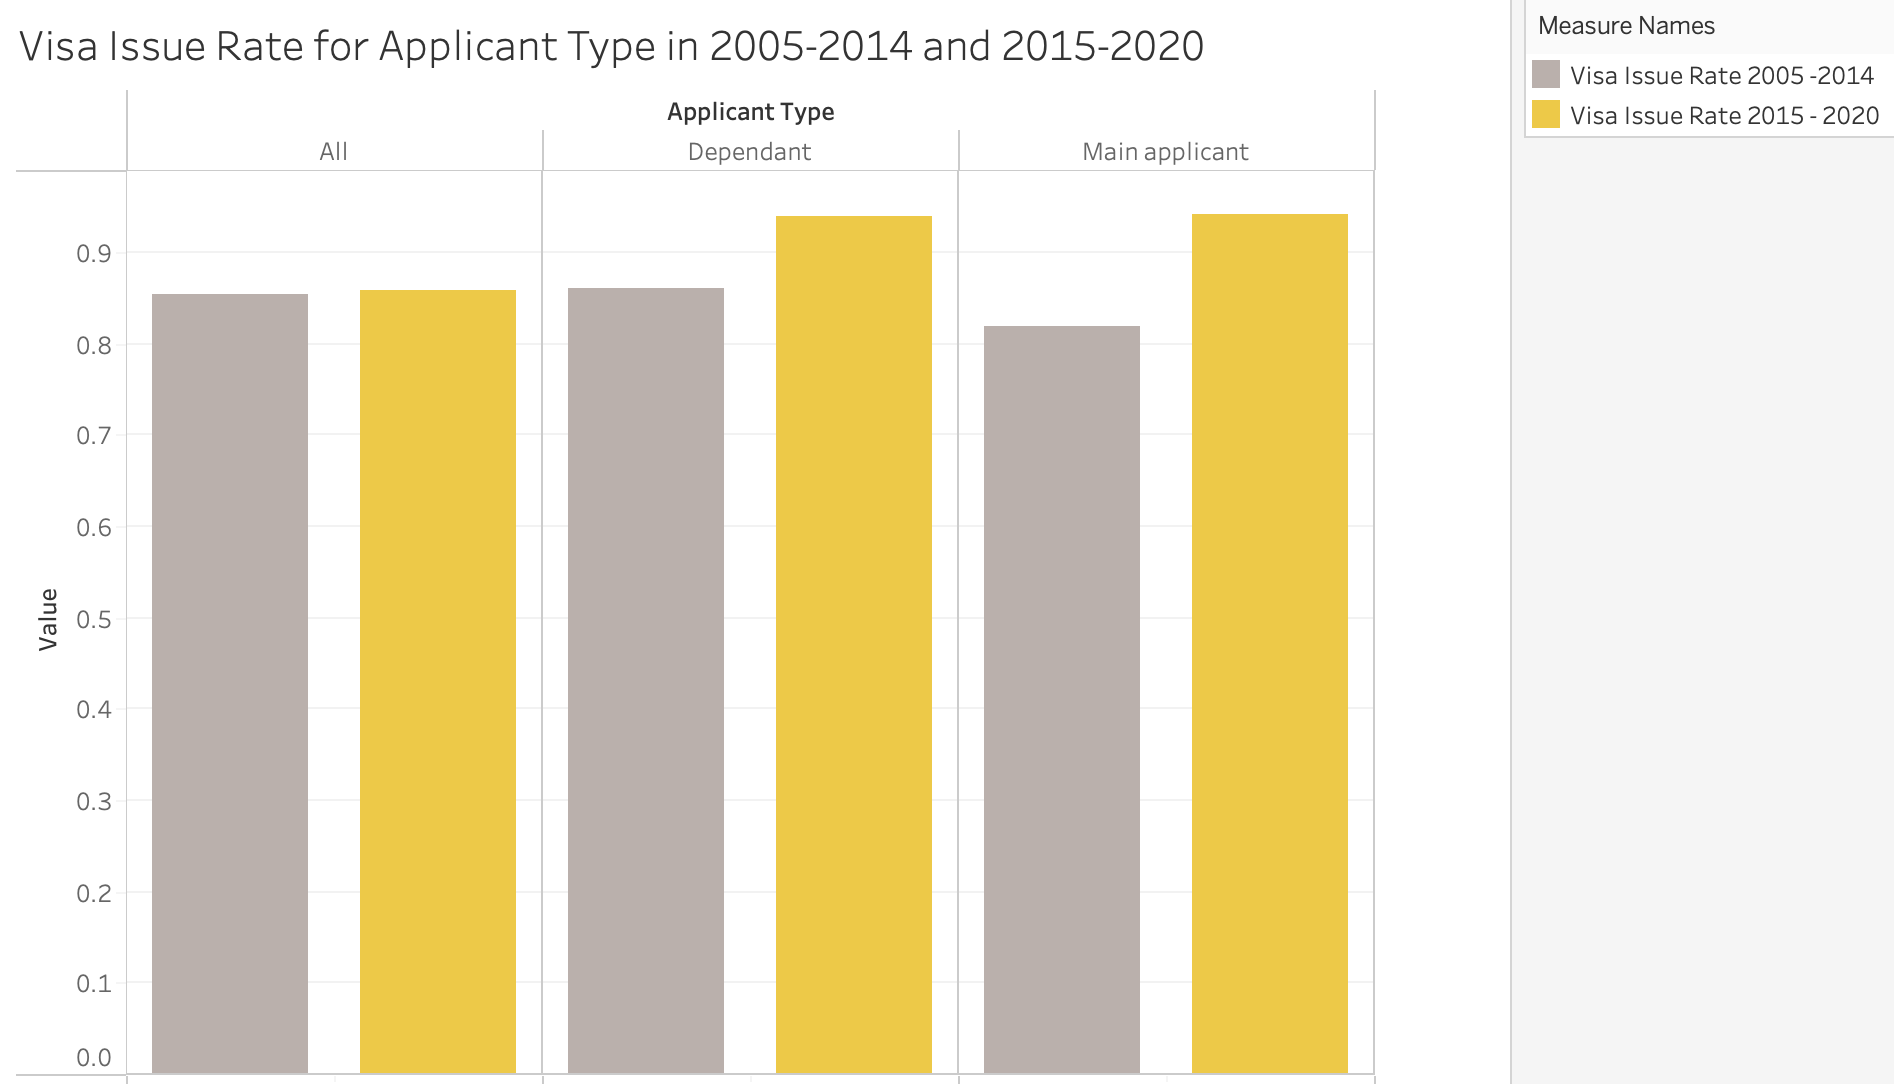